![Dataset Cover Image](Photo/dataset-cover.jpg)

# Dataset Overview

This dataset provides information on used car sales, including key variables that capture various attributes of the cars, 
such as their make, model, year of manufacture, transmission type, odometer reading, and selling price. The dataset also 
contains additional details about the condition of the cars, state of sale, and more.

**Key columns in the dataset:**
- **Year**: The year the car was manufactured.
- **Make**: The brand of the car.
- **Model**: The specific model of the car.
- **Trim**: A variant or version of the model with different features.
- **Body**: The type or category of the car (e.g., SUV, Sedan).
- **Transmission**: Type of transmission (automatic or manual).
- **VIN**: Vehicle Identification Number (unique identifier for each car).
- **State**: The state where the car is sold.
- **Condition**: The condition of the car when sold (e.g., new, used).
- **Odometer**: Number of miles the car has been driven.
- **Color**: The exterior color of the car.
- **Interior**: The interior color/material of the car.
- **Seller**: The seller of the car.
- **MMR**: Manheim Market Report value (provides a price benchmark for the vehicle).
- **Selling Price**: The actual selling price of the car.
- **Sale Date**: The date the car was sold.


# Data Preparation

### 1.  Importing Necessary Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv(r'car_prices.csv')
df.head()


year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

### 2. Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
df.describe().T

count          mean           std     min      25%      50%  \
year          558837.0   2010.038927      3.966864  1982.0   2007.0   2012.0   
condition     547017.0     30.672365     13.402832     1.0     23.0     35.0   
odometer      558743.0  68320.017767  53398.542821     1.0  28371.0  52254.0   
mmr           558799.0  13769.377495   9679.967174    25.0   7100.0  12250.0   
sellingprice  558825.0  13611.358810   9749.501628     1.0   6900.0  12100.0   

                  75%       max  
year           2013.0    2015.0  
condition        42.0      49.0  
odometer      99109.0  999999.0  
mmr           18300.0  182000.0  
sellingprice  18200.0  230000.0

In [5]:
df.count()

year            558837
make            548536
model           548438
trim            548186
body            545642
transmission    493485
vin             558833
state           558837
condition       547017
odometer        558743
color           558088
interior        558088
seller          558837
mmr             558799
sellingprice    558825
saledate        558825
dtype: int64

In [6]:
df.shape

(558837, 16)

In [7]:
df.columns = df.columns.str.strip().str.lower()

### 3. Data Cleaning

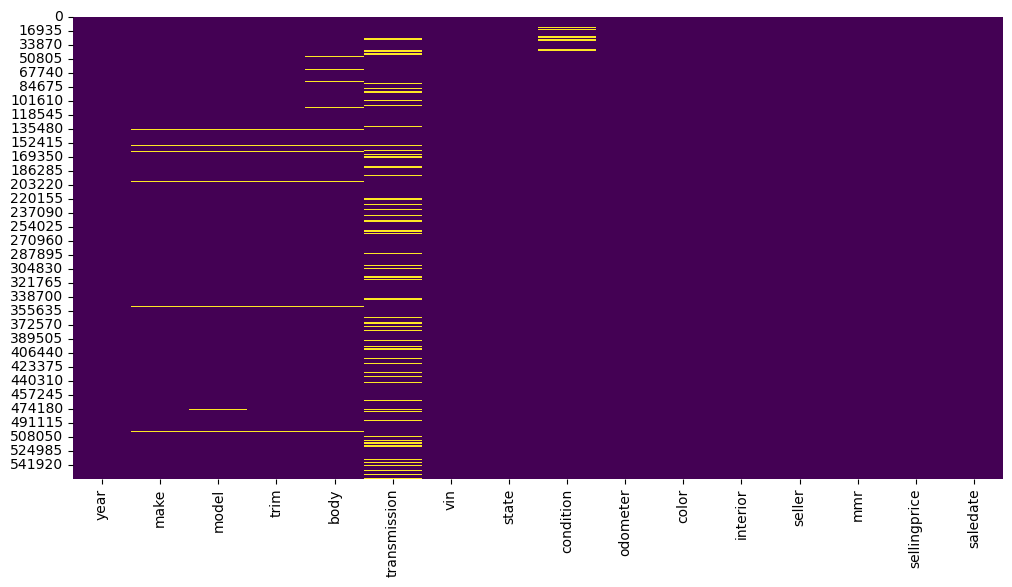

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [9]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [10]:
df.isnull().sum()/(df.shape[0])*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [11]:
fill_methods = {
    'make': 'mode',
    'model': 'mode',
    'trim': 'mode',
    'body': 'mode',
    'transmission': 'mode',
}
for column, method in fill_methods.items():
    if method == 'median':
        df[column].fillna(df[column].median(), inplace=True)
    elif method == 'mode':
        df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().mean() * 100

columns_to_drop = ['vin']

df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [13]:
df = df.dropna(subset=['sellingprice', 'saledate', 'mmr', 'make', 'color', 'odometer', 'condition', 'interior'])

In [14]:
df.isnull().mean() * 100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [15]:
df.shape

(546325, 15)

In [16]:
df.describe().T

count          mean           std     min      25%      50%  \
year          546325.0   2010.132280      3.906608  1982.0   2008.0   2012.0   
condition     546325.0     30.669557     13.400986     1.0     23.0     35.0   
odometer      546325.0  67289.743418  52781.847842     1.0  28072.0  51260.0   
mmr           546325.0  13903.192697   9652.965754    25.0   7375.0  12400.0   
sellingprice  546325.0  13751.715761   9724.318611     1.0   7100.0  12300.0   

                  75%       max  
year           2013.0    2015.0  
condition        42.0      49.0  
odometer      97438.0  999999.0  
mmr           18400.0  182000.0  
sellingprice  18300.0  230000.0

In [17]:
df.head()

year   make                model        trim   body transmission state  \
0  2015    Kia              Sorento          LX    SUV    automatic    ca   
1  2015    Kia              Sorento          LX    SUV    automatic    ca   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic    ca   
3  2015  Volvo                  S60          T5  Sedan    automatic    ca   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [18]:
df.duplicated().sum()

0

### 4. Feature Engineering

#### Handling Date Data

In [19]:
df.head()
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
sales_per_day = df['saledate'].dt.date.value_counts()

top_10_sales_days = sales_per_day.nlargest(10)

print("Top 10 sales days:")
display(top_10_sales_days)

C:\Users\eiadn\AppData\Local\Temp\ipykernel_26860\4039800103.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True)


Top 10 sales days:


saledate
2015-01-13    20898
2015-02-10    15902
2015-06-02    13882
2015-02-24    13799
2015-02-03    13787
2015-02-17    13540
2015-02-09    13040
2015-01-20    12206
2015-03-03    12102
2015-06-16    12087
Name: count, dtype: int64

In [20]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.day
df['sale_dayofweek'] = df['saledate'].dt.dayofweek
df.dtypes

year                            int64
make                           object
model                          object
trim                           object
body                           object
transmission                   object
state                          object
condition                     float64
odometer                      float64
color                          object
interior                       object
seller                         object
mmr                           float64
sellingprice                  float64
saledate          datetime64[ns, UTC]
sale_year                       int32
sale_month                      int32
sale_day                        int32
sale_dayofweek                  int32
dtype: object

#### Standardizing the condition Values

In [21]:
unique_conditions = df['condition'].unique()
unique_conditions

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 36.,
       35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

In [22]:
def unify_condition(value):
    if 1 <= value <= 5:
        return value
    elif 10 <= value <= 50:
        return round(value / 10)
    else:
        return None

In [23]:
df['condition'] = df['condition'].apply(unify_condition)
df['condition'].unique()


array([5., 4., 1., 3., 2.])

In [24]:
df['condition'].isnull().sum()/(df.shape[0])*100

0.0

In [25]:
df['condition'] = df['condition'].astype(int)
record_counts = df['condition'].value_counts().reset_index()
record_counts

condition   count
0          4  244240
1          3  124265
2          2  109184
3          5   60894
4          1    7742

#### Renaming States

In [26]:
state_names = {
    'ca': 'California', 'tx': 'Texas', 'pa': 'Pennsylvania', 'mn': 'Minnesota',
    'az': 'Arizona', 'wi': 'Wisconsin', 'tn': 'Tennessee', 'md': 'Maryland',
    'fl': 'Florida', 'ne': 'Nebraska', 'nj': 'New Jersey', 'nv': 'Nevada',
    'oh': 'Ohio', 'mi': 'Michigan', 'ga': 'Georgia', 'va': 'Virginia',
    'sc': 'South Carolina', 'nc': 'North Carolina', 'in': 'Indiana',
    'il': 'Illinois', 'co': 'Colorado', 'ut': 'Utah', 'mo': 'Missouri',
    'ny': 'New York', 'ma': 'Massachusetts', 'pr': 'Puerto Rico', 'or': 'Oregon',
    'la': 'Louisiana', 'wa': 'Washington', 'hi': 'Hawaii', 'qc': 'Quebec',
    'ab': 'Alberta', 'on': 'Ontario', 'ok': 'Oklahoma', 'ms': 'Mississippi',
    'nm': 'New Mexico', 'al': 'Alabama', 'ns': 'Nova Scotia'
}
df['state'] = df['state'].map(state_names)
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

        state  condition  odometer  color interior  \
0  California          5   16639.0  white    black   
1  California          5    9393.0  white    beige   
2  California          4    1331.0   gray    black   
3  California          4   14282.0  white    black   
4  California          4    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                   saledate  sale_year  sale_month  sale_day  sale_dayofweek  
0 2014-12-16 04:30:00+00:00       2014          12        16               1  
1 2014-12-16 04:30:00+00:00       2014          12        16               1  
2 2015-01-14 20:30:00+00:00       2015           1        14               2  
3 2015-01-28 20:30:00+00:00       2015           1        28               2  
4 2014-12-18 04:30:00+00:00       2014          12        18               3

### 5. Outlier Handling

#### Removing Illogical Values from sellingprice

In [27]:
df['Pricr_diff']=df['sellingprice'] - df['mmr']

In [28]:
def outliers_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]

In [29]:
for col in ['odometer','mmr','sellingprice']:
    df[col] = outliers_handling(df[col])

In [30]:
df['Pricr_diff'] = outliers_handling(df['Pricr_diff'])


In [31]:
df.isnull().sum()/(df.shape[0])*100

year              0.000000
make              0.000000
model             0.000000
trim              0.000000
body              0.000000
transmission      0.000000
state             0.000000
condition         0.000000
odometer          1.959456
color             0.000000
interior          0.000000
seller            0.000000
mmr               3.016886
sellingprice      2.970759
saledate          0.000000
sale_year         0.000000
sale_month        0.000000
sale_day          0.000000
sale_dayofweek    0.000000
Pricr_diff        6.290395
dtype: float64

In [32]:
df['sell_price']=df['Pricr_diff']+ df['mmr']

### Handling Missing and Inconsistent Values in Categorical Columns

In [33]:
Categorical_col = df.select_dtypes(include= 'object').columns

In [34]:
df[Categorical_col] = df[Categorical_col].apply(lambda col: col.str.upper())

In [35]:
df['seller'].unique()

array(['KIA MOTORS AMERICA  INC',
       'FINANCIAL SERVICES REMARKETING (LEASE)',
       'VOLVO NA REP/WORLD OMNI', ..., 'MASERATI NORTH AMERICA INC',
       'ALTERNATIVE FINANCIAL GROUP INC', 'I -5 UHLMANN RV'], dtype=object)

In [36]:
df['seller'] = df['seller'].str.lower().str.strip()
df['seller'] = df['seller'].str.replace('-', ' ', regex=False)

In [37]:
df['seller'].value_counts()

seller
nissan infiniti lt               29631
ford motor credit company llc    19103
the hertz corporation            18286
santander consumer               15277
avis corporation                 12510
                                 ...  
autotrust inc                        1
thoroughbred motors llc              1
titlemax/alexandria va4              1
fmi enterprises                      1
i  5 uhlmann rv                      1
Name: count, Length: 12951, dtype: int64

In [38]:
df['seller'].unique()

array(['kia motors america  inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i  5 uhlmann rv'], dtype=object)

In [39]:
columns_with_weird_values = ['color', 'interior']
for column in columns_with_weird_values:
    weird_rows_count = df[df[column] == '—'].shape[0]
    total_rows = df.shape[0]
    percentage_weird_rows = (weird_rows_count / total_rows) * 100

    print(f'Column: {column}')
    print(f'Weird rows count: {weird_rows_count}')
    print(f'Percentage of weird rows: {percentage_weird_rows:.2f}%\n')


Column: color
Weird rows count: 24614
Percentage of weird rows: 4.51%

Column: interior
Weird rows count: 11844
Percentage of weird rows: 2.17%



In [40]:
for col in ['color', 'interior']:
    most_common_value = df[col].mode()[0]
    df[col] = df[col].replace('—', most_common_value)
    weird_rows_count = df[df[col] == '—'].shape[0]
    percentage_weird_rows = (weird_rows_count / df.shape[0]) * 100
    print(f"Percentage of rows with weird '{col}' values after replacement: {percentage_weird_rows:.2f}%")

Percentage of rows with weird 'color' values after replacement: 0.00%
Percentage of rows with weird 'interior' values after replacement: 0.00%


In [41]:
df.isnull().mean() * 100


year              0.000000
make              0.000000
model             0.000000
trim              0.000000
body              0.000000
transmission      0.000000
state             0.000000
condition         0.000000
odometer          1.959456
color             0.000000
interior          0.000000
seller            0.000000
mmr               3.016886
sellingprice      2.970759
saledate          0.000000
sale_year         0.000000
sale_month        0.000000
sale_day          0.000000
sale_dayofweek    0.000000
Pricr_diff        6.290395
sell_price        8.659864
dtype: float64

In [42]:
df = df.dropna(subset=['sell_price'])
df = df.dropna(subset=['odometer'])
df = df.drop(columns=['Pricr_diff'])
df = df.drop(columns=['sellingprice'])

In [43]:
df.shape

(488667, 19)

In [44]:
df.dtypes


year                            int64
make                           object
model                          object
trim                           object
body                           object
transmission                   object
state                          object
condition                       int32
odometer                      float64
color                          object
interior                       object
seller                         object
mmr                           float64
saledate          datetime64[ns, UTC]
sale_year                       int32
sale_month                      int32
sale_day                        int32
sale_dayofweek                  int32
sell_price                    float64
dtype: object

In [45]:
df.columns


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'saledate', 'sale_year', 'sale_month', 'sale_day', 'sale_dayofweek',
       'sell_price'],
      dtype='object')

In [46]:
df.head()


year       make     model        trim   body transmission       state  \
0  2015        KIA   SORENTO          LX    SUV    AUTOMATIC  CALIFORNIA   
1  2015        KIA   SORENTO          LX    SUV    AUTOMATIC  CALIFORNIA   
2  2014        BMW  3 SERIES  328I SULEV  SEDAN    AUTOMATIC  CALIFORNIA   
3  2015      VOLVO       S60          T5  SEDAN    AUTOMATIC  CALIFORNIA   
7  2014  CHEVROLET     CRUZE         1LT  SEDAN    AUTOMATIC  CALIFORNIA   

   condition  odometer  color interior  \
0          5   16639.0  WHITE    BLACK   
1          5    9393.0  WHITE    BEIGE   
2          4    1331.0   GRAY    BLACK   
3          4   14282.0  WHITE    BLACK   
7          2   28617.0  BLACK    BLACK   

                                              seller      mmr  \
0                            kia motors america  inc  20500.0   
1                            kia motors america  inc  20800.0   
2             financial services remarketing (lease)  31900.0   
3                            volvo na rep/world omni  27500.0   
7  enterprise vehicle exchange / tra / rental / t...  11900.0   

                   saledate  sale_year  sale_month  sale_day  sale_dayofweek  \
0 2014-12-16 04:30:00+00:00       2014          12        16               1   
1 2014-12-16 04:30:00+00:00       2014          12        16               1   
2 2015-01-14 20:30:00+00:00       2015           1        14               2   
3 2015-01-28 20:30:00+00:00       2015           1        28               2   
7 2014-12-16 05:00:00+00:00       2014          12        16               1   

   sell_price  
0     21500.0  
1     21500.0  
2     30000.0  
3     27750.0  
7      9800.0

In [47]:
df.describe().T

count          mean           std     min      25%  \
year            488667.0   2010.157815      3.807584  1982.0   2008.0   
condition       488667.0      3.467335      0.943698     1.0      3.0   
odometer        488667.0  65735.333892  46297.634564     1.0  29138.0   
mmr             488667.0  12890.621272   7471.288043    25.0   7300.0   
sale_year       488667.0   2014.923586      0.265660  2014.0   2015.0   
sale_month      488667.0      3.613115      3.027329     1.0      1.0   
sale_day        488667.0     14.544819      8.660383     1.0      7.0   
sale_dayofweek  488667.0      1.446928      1.240843     0.0      1.0   
sell_price      488667.0  12839.207211   7561.022752   100.0   7200.0   

                    50%      75%       max  
year             2012.0   2013.0    2015.0  
condition           4.0      4.0       5.0  
odometer        52298.0  96921.0  201485.0  
mmr             12100.0  17500.0   34900.0  
sale_year        2015.0   2015.0    2015.0  
sale_month          2.0      6.0      12.0  
sale_day           15.0     21.0      31.0  
sale_dayofweek      1.0      2.0       6.0  
sell_price      12100.0  17500.0   37700.0

In [48]:
cols = df.columns.tolist()
cols.remove('sell_price')
cols.insert(cols.index('mmr') + 1, 'sell_price')
df = df[cols]

In [49]:
df.dtypes

year                            int64
make                           object
model                          object
trim                           object
body                           object
transmission                   object
state                          object
condition                       int32
odometer                      float64
color                          object
interior                       object
seller                         object
mmr                           float64
sell_price                    float64
saledate          datetime64[ns, UTC]
sale_year                       int32
sale_month                      int32
sale_day                        int32
sale_dayofweek                  int32
dtype: object

In [50]:
df.isnull().mean() * 100


year              0.0
make              0.0
model             0.0
trim              0.0
body              0.0
transmission      0.0
state             0.0
condition         0.0
odometer          0.0
color             0.0
interior          0.0
seller            0.0
mmr               0.0
sell_price        0.0
saledate          0.0
sale_year         0.0
sale_month        0.0
sale_day          0.0
sale_dayofweek    0.0
dtype: float64

### to CSV for ML


In [51]:
df.to_csv('cleaned_car_prices.csv', index=False)

# **Exploratory Data Analysis**

## **Univariant Analysis**

### **Distributions**

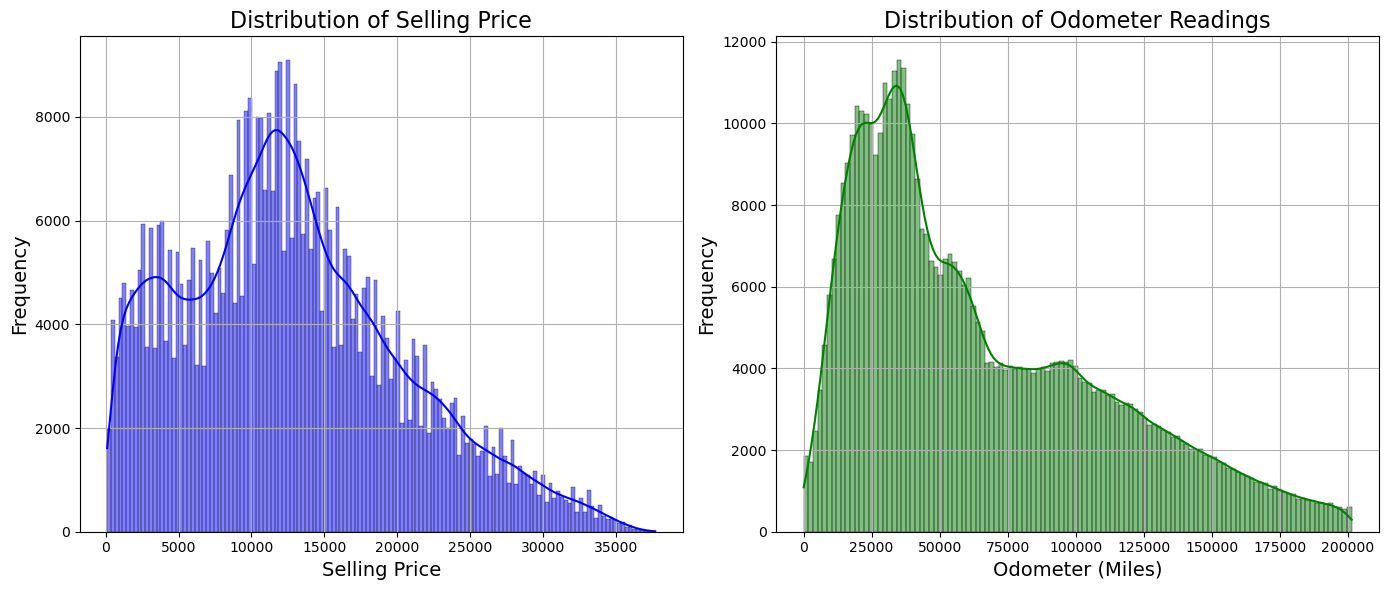

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['sell_price'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Selling Price', fontsize=16)
axes[0].set_xlabel('Selling Price', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True)
sns.histplot(df['odometer'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Odometer Readings', fontsize=16)
axes[1].set_xlabel('Odometer (Miles)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True)

plt.tight_layout()

plt.show()

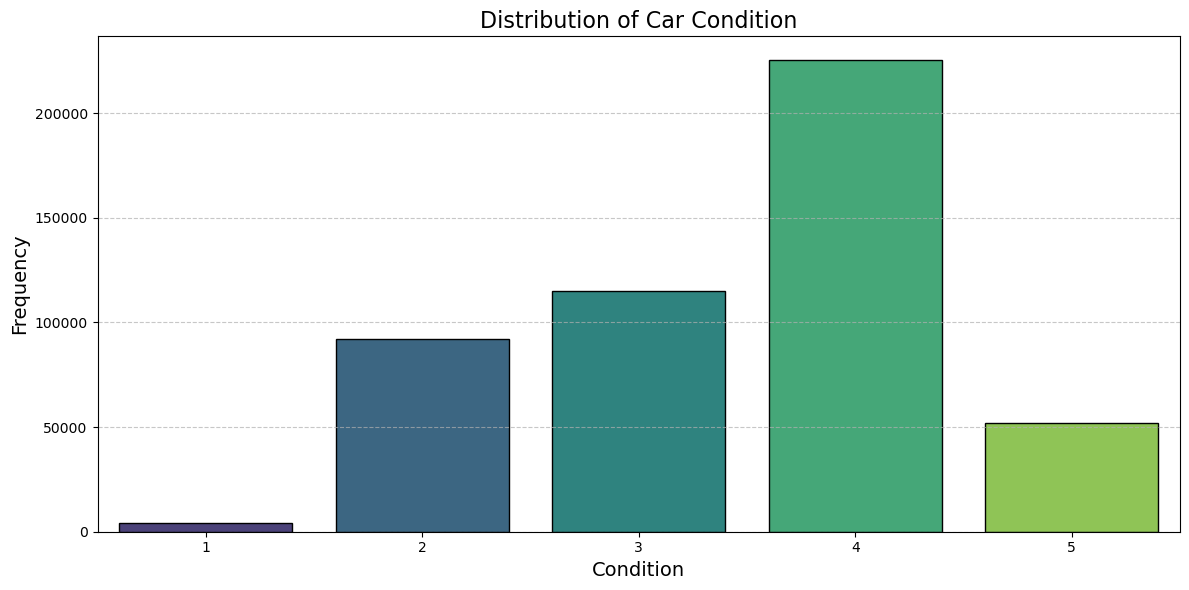

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='condition', data=df, palette='viridis', edgecolor='black')  # استخدام palette لإضافة ألوان جذابة
plt.title('Distribution of Car Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

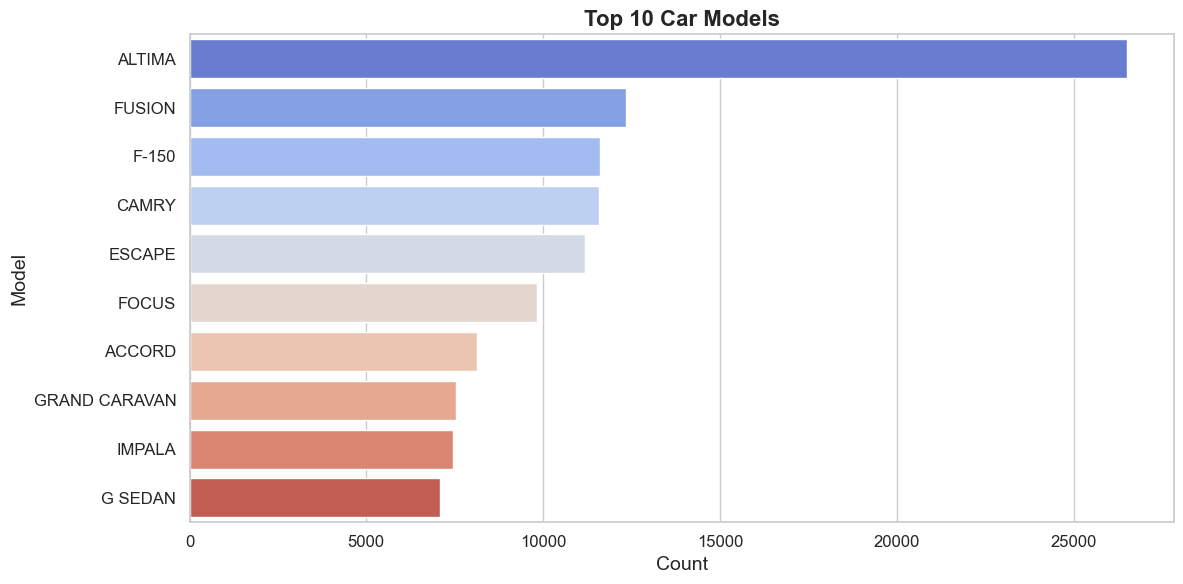

In [54]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.countplot(y='model', data=df, order=df['model'].value_counts().index[:10], palette='coolwarm')
plt.title('Top 10 Car Models', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

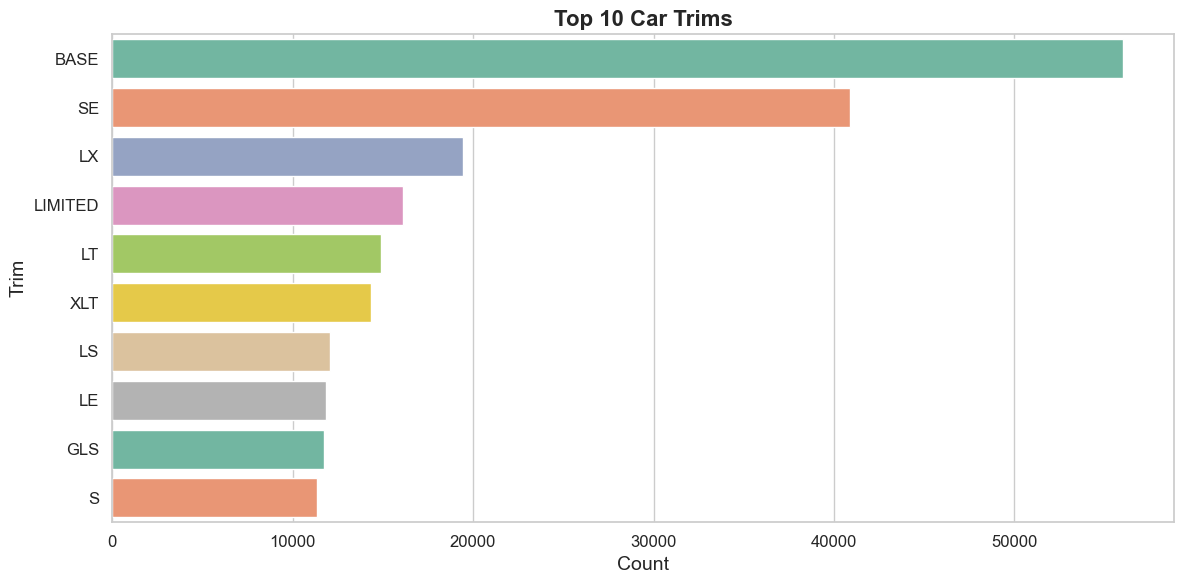

In [55]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.countplot(y='trim', data=df, order=df['trim'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Car Trims', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Trim', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

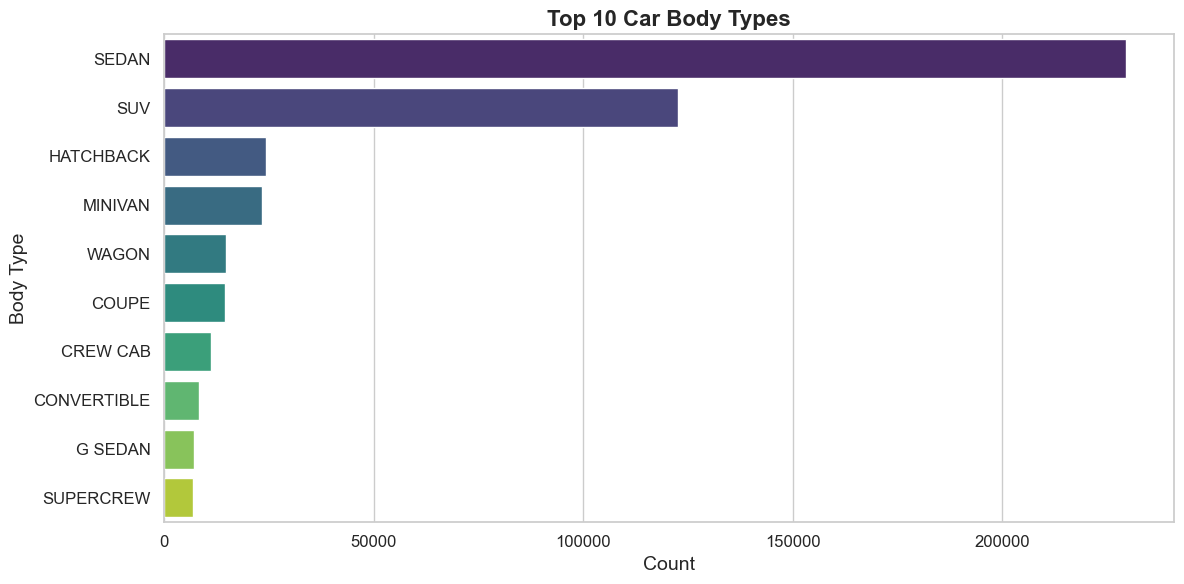

In [56]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.countplot(y='body', data=df, order=df['body'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Car Body Types', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Body Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

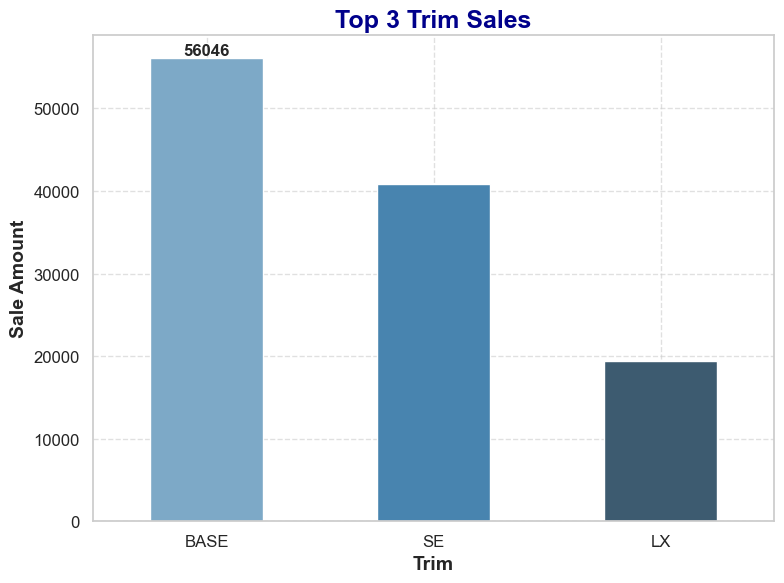

In [57]:
top_3_trims = df['trim'].value_counts().nlargest(3)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_3_trims.index, y=top_3_trims.values, palette="Blues_d", width=0.5)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold')
plt.title('Top 3 Trim Sales', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Trim', fontsize=14, fontweight='bold')
plt.ylabel('Sale Amount', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### ***Some Questions And Insights:***

#### **What is the shape of cars on the market?**

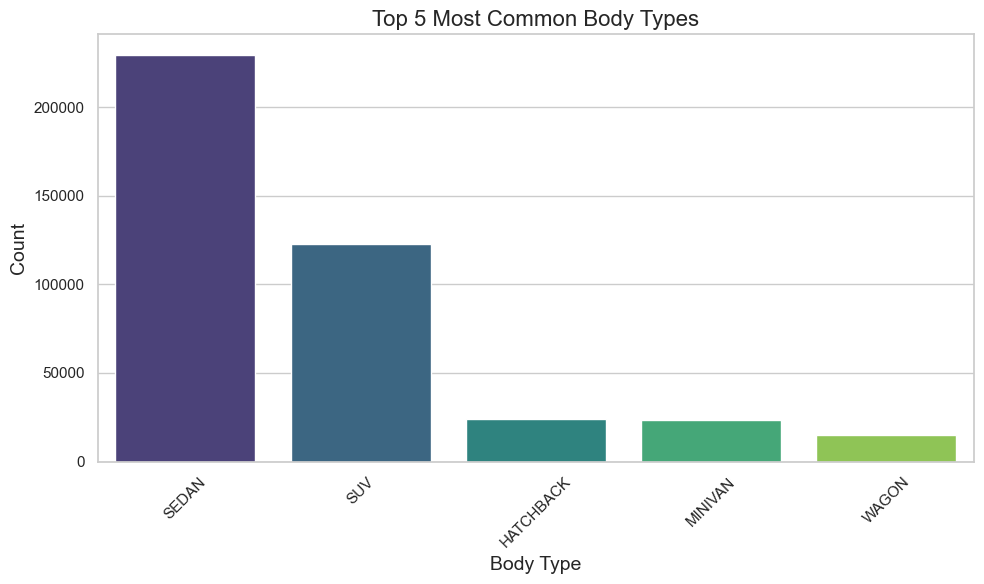

In [58]:
top_5_body = df['body'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_body.index, y=top_5_body.values, palette='viridis')
plt.title('Top 5 Most Common Body Types', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


> The distribution of car bodies indicates a strong preference for sedans and SUVs in the market.

#### **What are the days and months in which the sale is most frequent?**

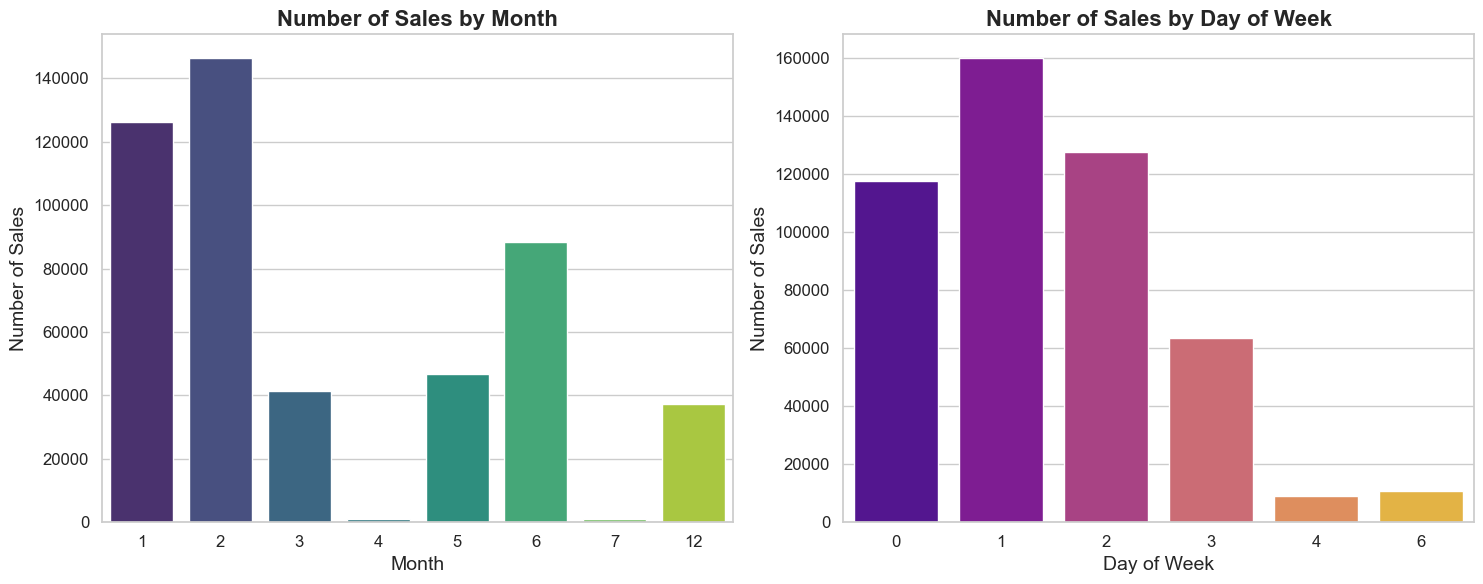

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# sns.set(style="whitegrid")
sns.countplot(x='sale_month', data=df, ax=axs[0], palette='viridis')
axs[0].set_title('Number of Sales by Month', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Number of Sales', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
sns.countplot(x='sale_dayofweek', data=df, ax=axs[1], palette='plasma')
axs[1].set_title('Number of Sales by Day of Week', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Day of Week', fontsize=14)
axs[1].set_ylabel('Number of Sales', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

> Tuesday is the most peak day for sale & February is the best-selling month in the data


#### **What year is the best-selling car?**

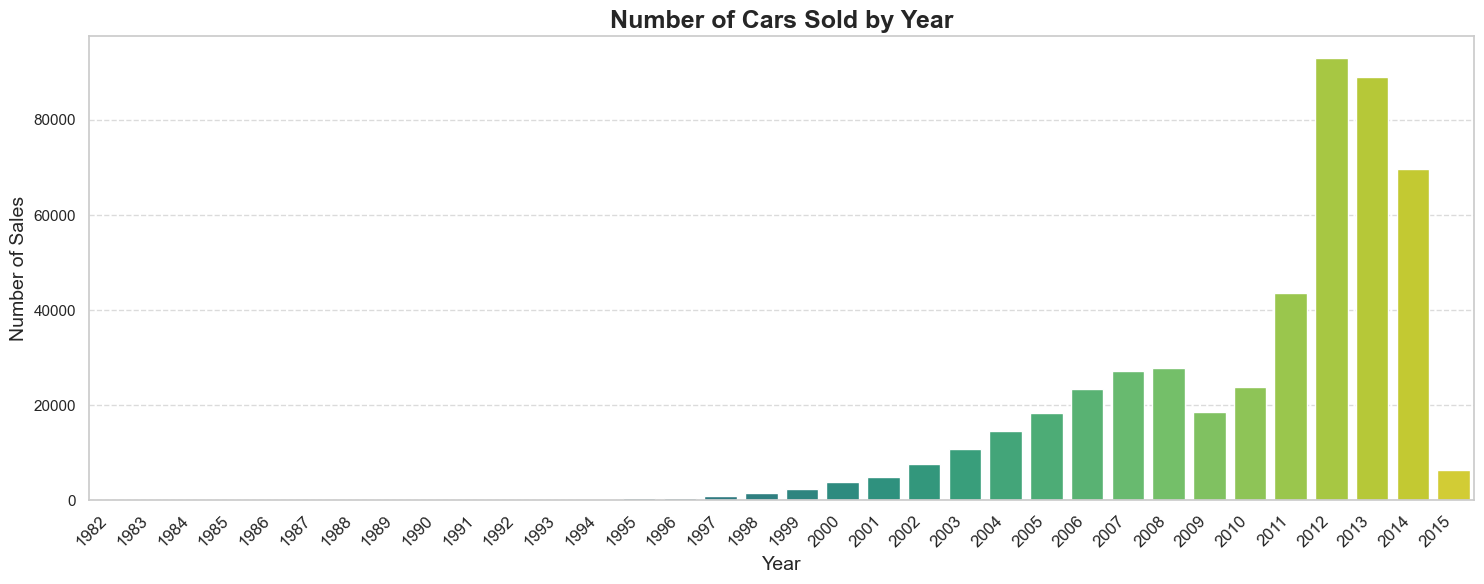

In [60]:
plt.figure(figsize=(15, 6))
sns.countplot(x='year', data=df, palette='viridis')

plt.title('Number of Cars Sold by Year', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> 2012 cars are the best sellers

#### **What are the best-selling brands on the market?**




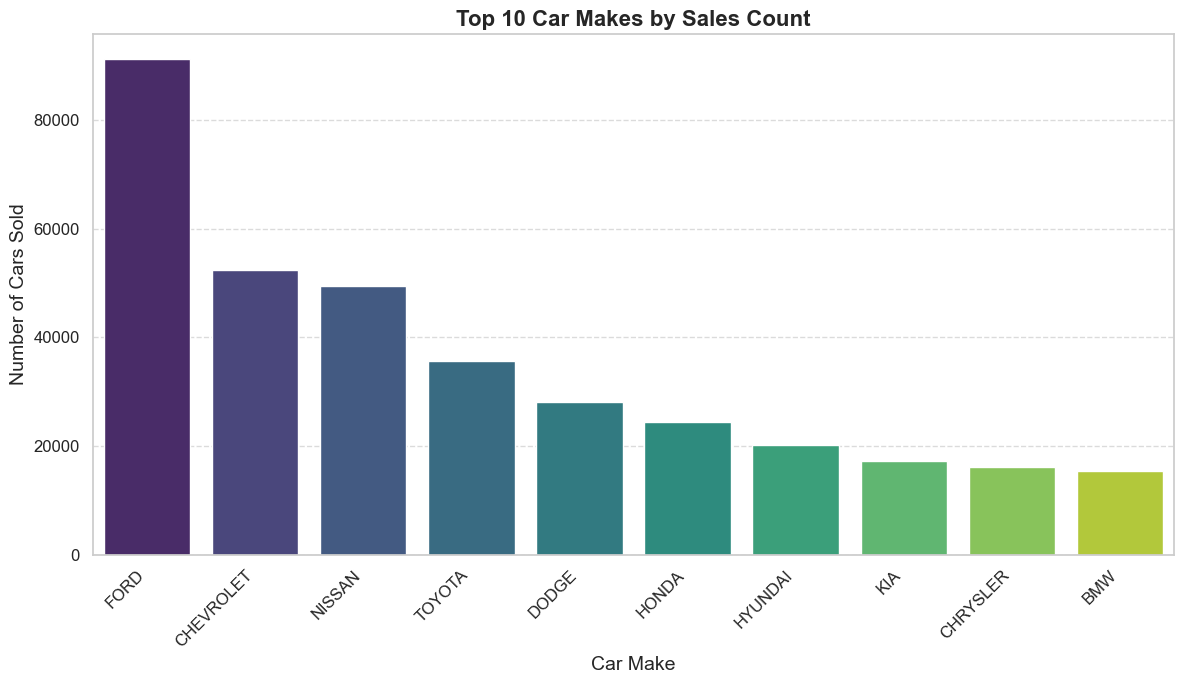

In [61]:
top_makes = df['make'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Car Makes by Sales Count', fontsize=16, fontweight='bold')
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> Ford, Chevrolet then nissan are the most in demand

#### **What is the average price in the market?**

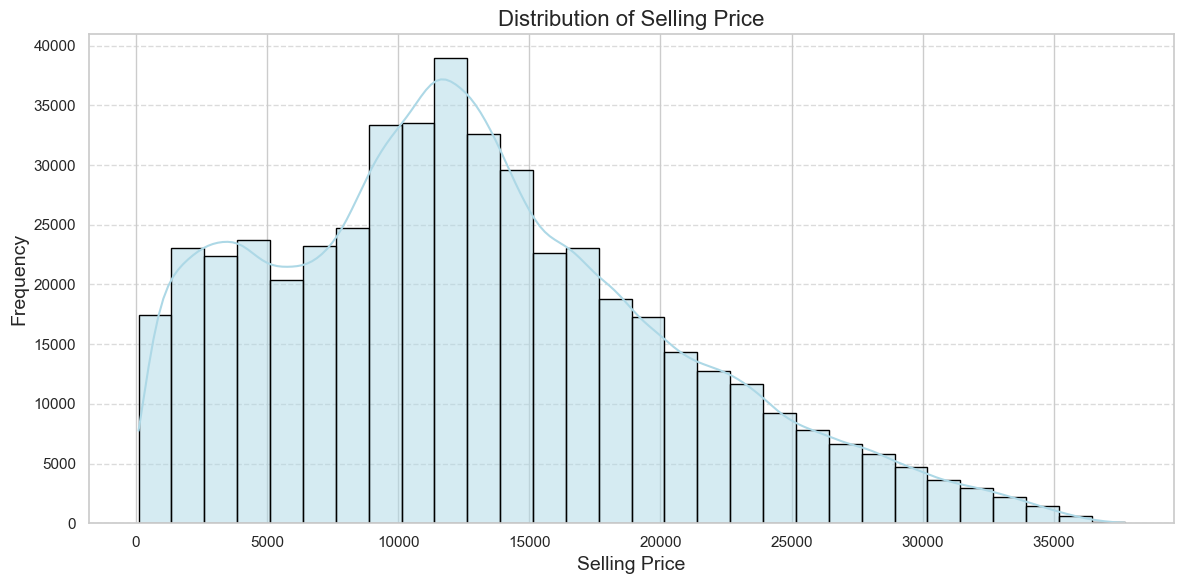

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sell_price'], bins=30, kde=True, color='lightblue', edgecolor='black')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> We will notice that most of the prices are in the range of 10000 and 15000

#### **Are most cars on the market automatic?**

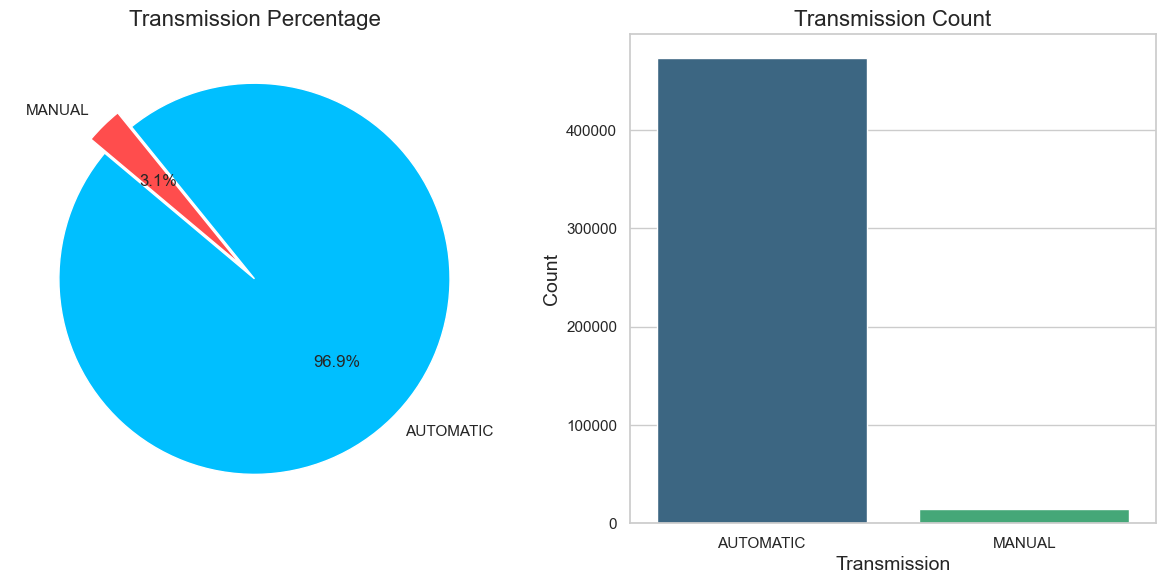

In [63]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(1, 2)

transmission = df['transmission'].value_counts()

axes[0].pie(transmission,
             labels=transmission.index,
             autopct="%1.1f%%",
             explode=[0, 0.1],
             colors=['#00bfff', '#ff4d4d'],
             startangle=140)
axes[0].set_title('Transmission Percentage', fontsize=16)

sns.countplot(data=df, x='transmission', ax=axes[1], palette='viridis')
axes[1].set_title('Transmission Count', fontsize=16)
axes[1].set_xlabel('Transmission', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

> 96.9% Automatic and 3.1% Manual

#### **What colors do buyers prerfer?**

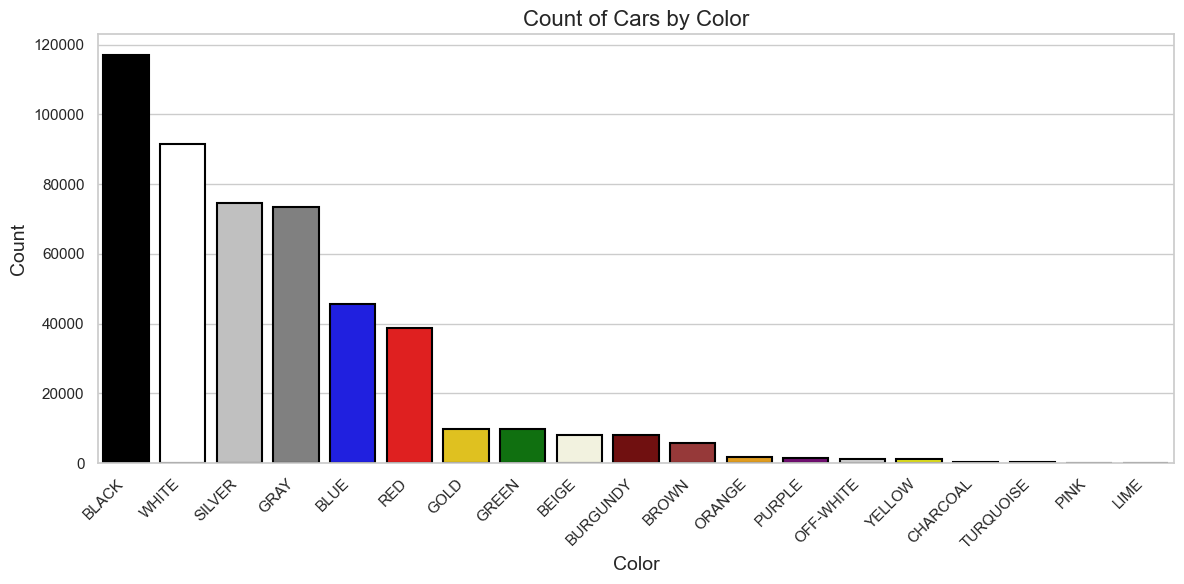

In [64]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

custom_palette = {
    'BLACK': 'black',
    'WHITE': 'white',
    'SILVER': 'silver',
    'GRAY': 'gray',
    'BLUE': 'blue',
    'RED': 'red',
    'GOLD': 'gold',
    'GREEN': 'green',
    'BEIGE': 'beige',
    'BURGUNDY': 'maroon',
    'BROWN': 'brown',
    'ORANGE': 'orange',
    'PURPLE': 'purple',
    'OFF-WHITE': 'lightgray',
    'YELLOW': 'yellow',
    'CHARCOAL': 'dimgray',
    'TURQUOISE': 'turquoise',
    'PINK': 'pink',
    'LIME': 'lime'
}

color_counts = df['color'].value_counts().reset_index()
color_counts.columns = ['color', 'count']

bar_plot = sns.barplot(x='color', y='count', data=color_counts, palette=custom_palette)
plt.xticks(rotation=45, ha='right')

for bar in bar_plot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
plt.title('Count of Cars by Color', fontsize=16)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

> Black color is the most requested as expected

#### **Where are the most sold cars?**

In [65]:
state_abbreviations = {
    'CALIFORNIA': 'CA',
    'NEW JERSEY': 'NJ',
    'GEORGIA': 'GA',
    'VIRGINIA': 'VA',
    'INDIANA': 'IN',
    'ILLINOIS': 'IL',
    'MINNESOTA': 'MN',
    'MICHIGAN': 'MI',
    'OHIO': 'OH',
    'TEXAS': 'TX',
    'ARIZONA': 'AZ',
    'COLORADO': 'CO',
    'MISSOURI': 'MO',
    'PENNSYLVANIA': 'PA',
    'NEBRASKA': 'NE',
    'NEVADA': 'NV',
    'MASSACHUSETTS': 'MA',
    'UTAH': 'UT',
    'PUERTO RICO': 'PR',
    'NORTH CAROLINA': 'NC',
    'FLORIDA': 'FL',
    'SOUTH CAROLINA': 'SC',
    'NEW YORK': 'NY',
    'WISCONSIN': 'WI',
    'MARYLAND': 'MD',
    'TENNESSEE': 'TN',
    'WASHINGTON': 'WA',
    'LOUISIANA': 'LA',
    'OREGON': 'OR',
    'HAWAII': 'HI',
    'OKLAHOMA': 'OK',
    'MISSISSIPPI': 'MS',
    'NEW MEXICO': 'NM',
    'ALABAMA': 'AL'
}
df_temp = df['state'].replace(state_abbreviations)


In [66]:
state_counts = df_temp.value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    scope="usa",
    color_continuous_scale="Blues",
    title="Distribution of Selling Price Across States"
)

fig.show()

> Most sales are made in Florida and then California.

## **Bivariante Analysis**

#### **Some Visualizations to understand the data in a better way**

C:\Users\eiadn\AppData\Local\Temp\ipykernel_26860\3756315903.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



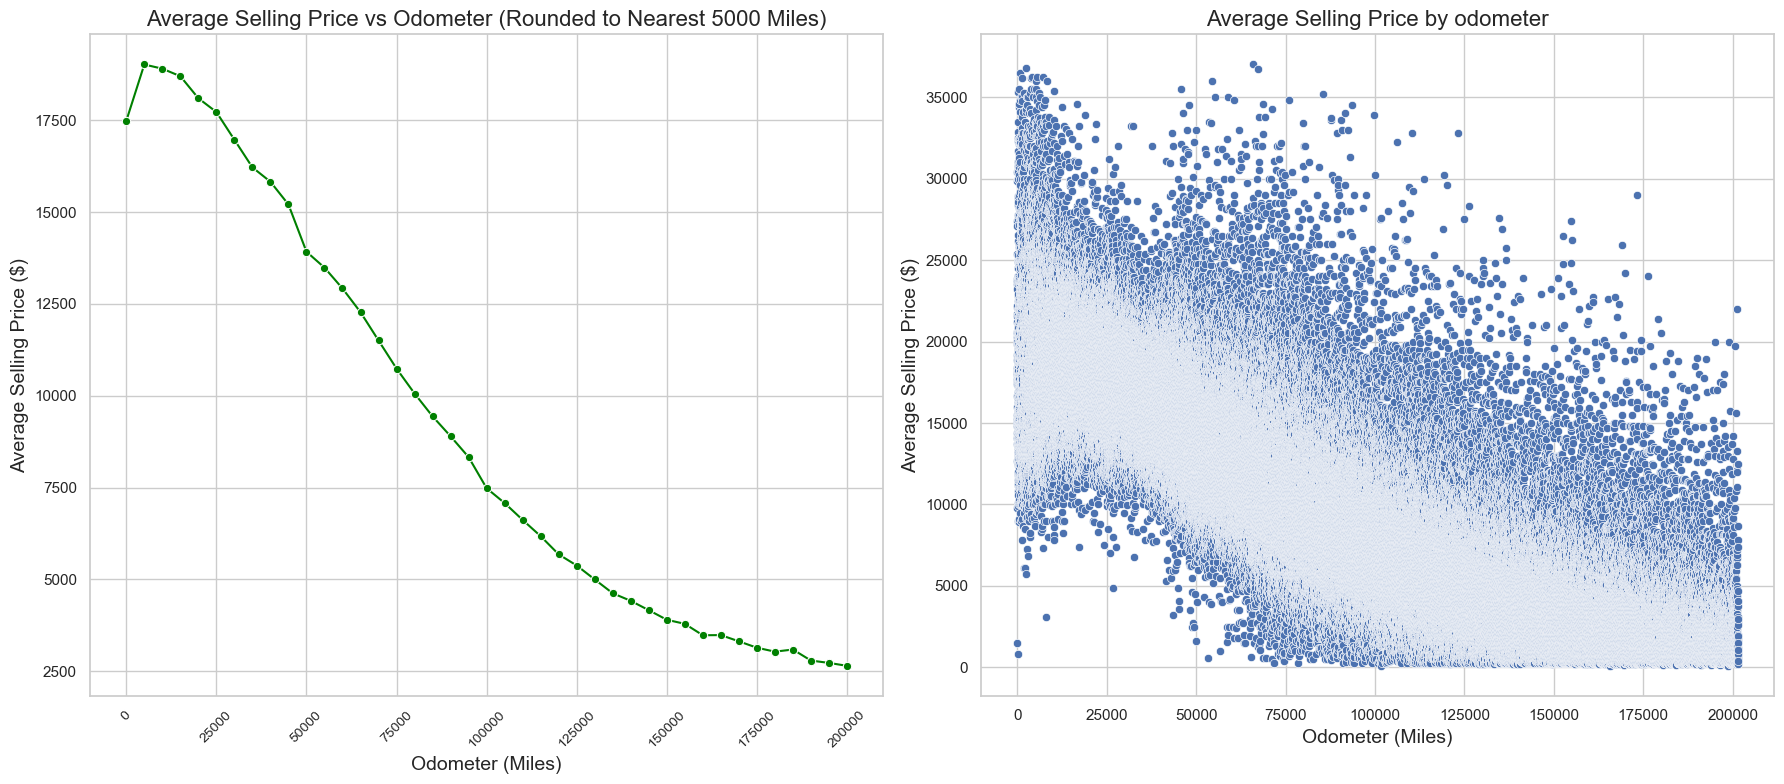

In [67]:
newdata = df[['sell_price', 'odometer']]
newdata['odometer_group'] = (newdata['odometer'] // 5000) * 5000
avg_price_by_group = newdata.groupby('odometer_group')['sell_price'].mean().reset_index()

avg_price_by_mileage = df.groupby('odometer')['sell_price'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.lineplot(data=avg_price_by_group, x='odometer_group', y='sell_price', marker='o', color='green', ax=axs[0])
axs[0].set_title('Average Selling Price vs Odometer (Rounded to Nearest 5000 Miles)', fontsize=16)
axs[0].set_xlabel('Odometer (Miles)', fontsize=14)
axs[0].set_ylabel('Average Selling Price ($)', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)

sns.scatterplot(data=avg_price_by_mileage, x='odometer', y='sell_price', ax=axs[1])
axs[1].set_title('Average Selling Price by odometer', fontsize=16)
axs[1].set_xlabel('Odometer (Miles)', fontsize=14)
axs[1].set_ylabel('Average Selling Price ($)', fontsize=14)

plt.tight_layout()
plt.show()


> The more distances a car travels, the less its value is in the market

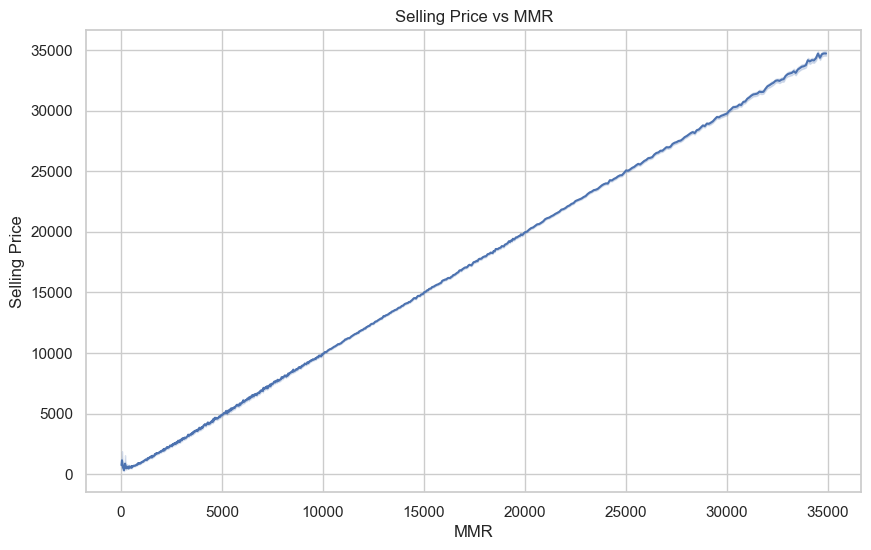

In [68]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mmr', y='sell_price', data=df)
plt.title('Selling Price vs MMR')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

> The selling price and the MMR are approximately equal

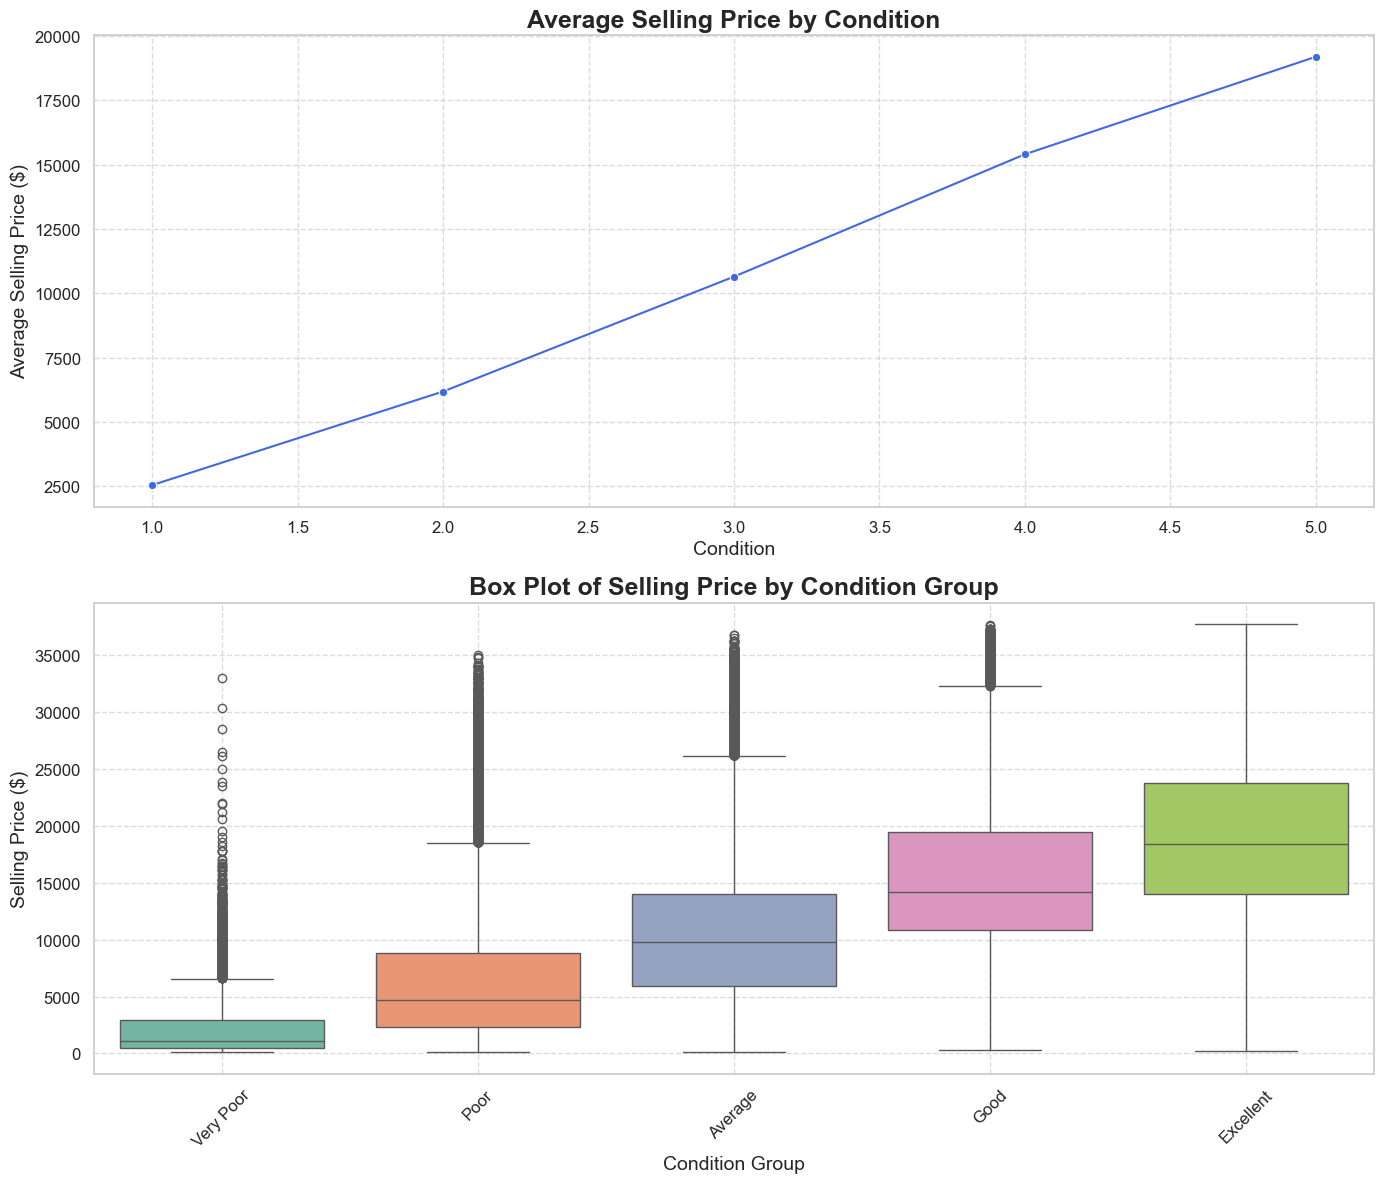

In [69]:
avg_price_by_condition = df.groupby('condition')['sell_price'].mean().reset_index()

plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)  
sns.lineplot(data=avg_price_by_condition, x='condition', y='sell_price', marker='o', color='royalblue')
plt.title('Average Selling Price by Condition', fontsize=18, fontweight='bold')
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

df['condition_group'] = pd.cut(df['condition'],
                               bins=[0, 1, 2, 3, 4, 5],
                               labels=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
                               include_lowest=True)

plt.subplot(2, 1, 2)  
sns.boxplot(data=df, x='condition_group', y='sell_price', palette='Set2', 
            order=['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'])
plt.title('Box Plot of Selling Price by Condition Group', fontsize=18, fontweight='bold')
plt.xlabel('Condition Group', fontsize=14)
plt.ylabel('Selling Price ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> The average selling price of cars significantly increases with better condition ratings. Notably, cars rated as "Excellent" command the highest prices, while those rated as "Very Poor" show a wide price range, indicating potential losses for sellers.



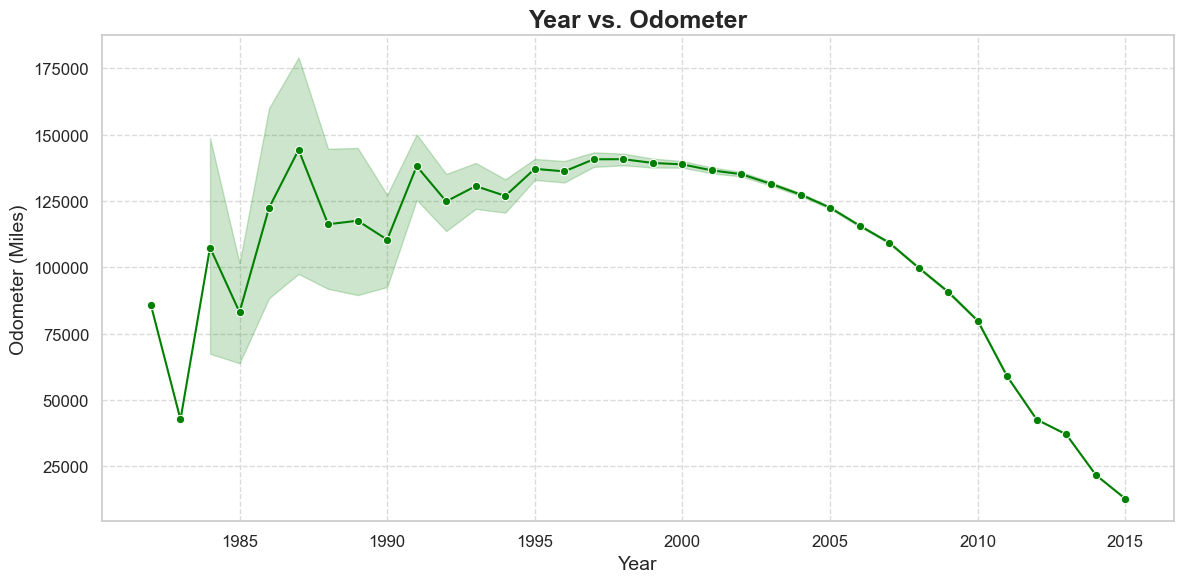

In [70]:
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df, x='year', y='odometer', color='green', marker='o')  

plt.title('Year vs. Odometer', fontsize=18, fontweight='bold')  
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Odometer (Miles)', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()


> Mostly the newer the car, the less the distance traveled than the old one

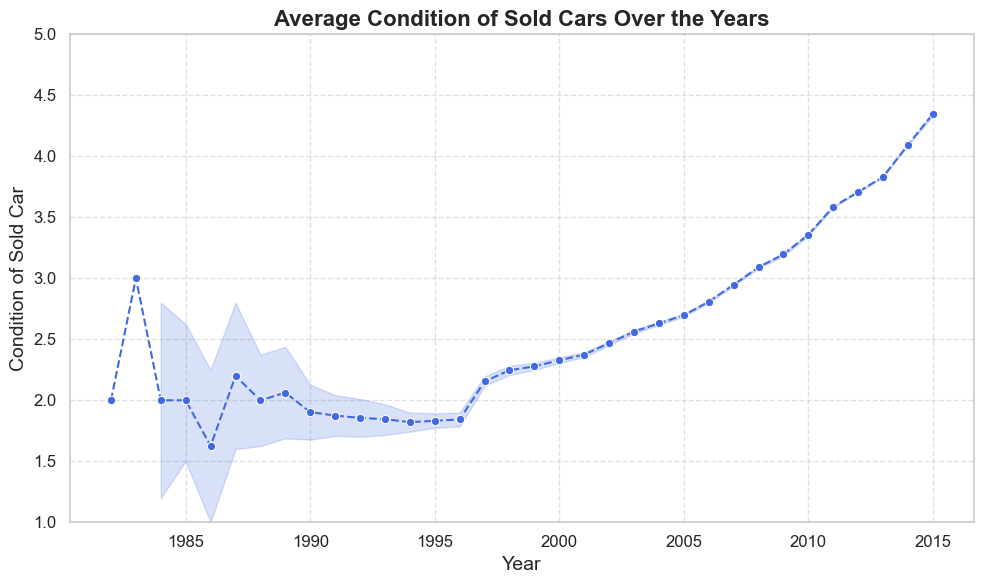

In [71]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='condition', data=df, marker='o', linestyle='--', color='royalblue')

plt.title('Average Condition of Sold Cars Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Condition of Sold Car', fontsize=14)
plt.ylim(1, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

> The older cars are in worse condition than the new one because the situation worsens with the passage of time

#### Analysis of Car Sales and Total Revenue Over Years

In [72]:
import plotly.graph_objects as go

p = df.groupby('year').agg({'sell_price': ['count', 'sum']})
p.columns = ['sales_count', 'total_revenue']

fig = go.Figure()
fig.update_layout(yaxis=dict(title='Car Sold'), yaxis2=dict(title='Total Revenue', overlaying='y', side='right'), title='Distribution of Car Year and Total Revenue', template='plotly_white')
trace_1 = go.Bar(x=p.index, y=p['sales_count'])
trace_2 = go.Scatter(x=p.index, y=p['total_revenue'], yaxis='y2', mode='lines+markers', line=dict(color='green'))
fig.add_traces([trace_1, trace_2])

fig.update_traces(selector=dict(type='bar'), name='Sales Count')
fig.update_traces(selector=dict(type='scatter'), name='Total Revenue')
fig.show()

#### **What is the average car prices in the market?**

C:\Users\eiadn\AppData\Local\Temp\ipykernel_26860\1971361793.py:31: UserWarning:


The palette list has fewer values (10) than needed (40) and will cycle, which may produce an uninterpretable plot.

C:\Users\eiadn\AppData\Local\Temp\ipykernel_26860\1971361793.py:31: UserWarning:


The palette list has fewer values (10) than needed (44) and will cycle, which may produce an uninterpretable plot.

C:\Users\eiadn\AppData\Local\Temp\ipykernel_26860\1971361793.py:31: UserWarning:


The palette list has fewer values (10) than needed (52) and will cycle, which may produce an uninterpretable plot.



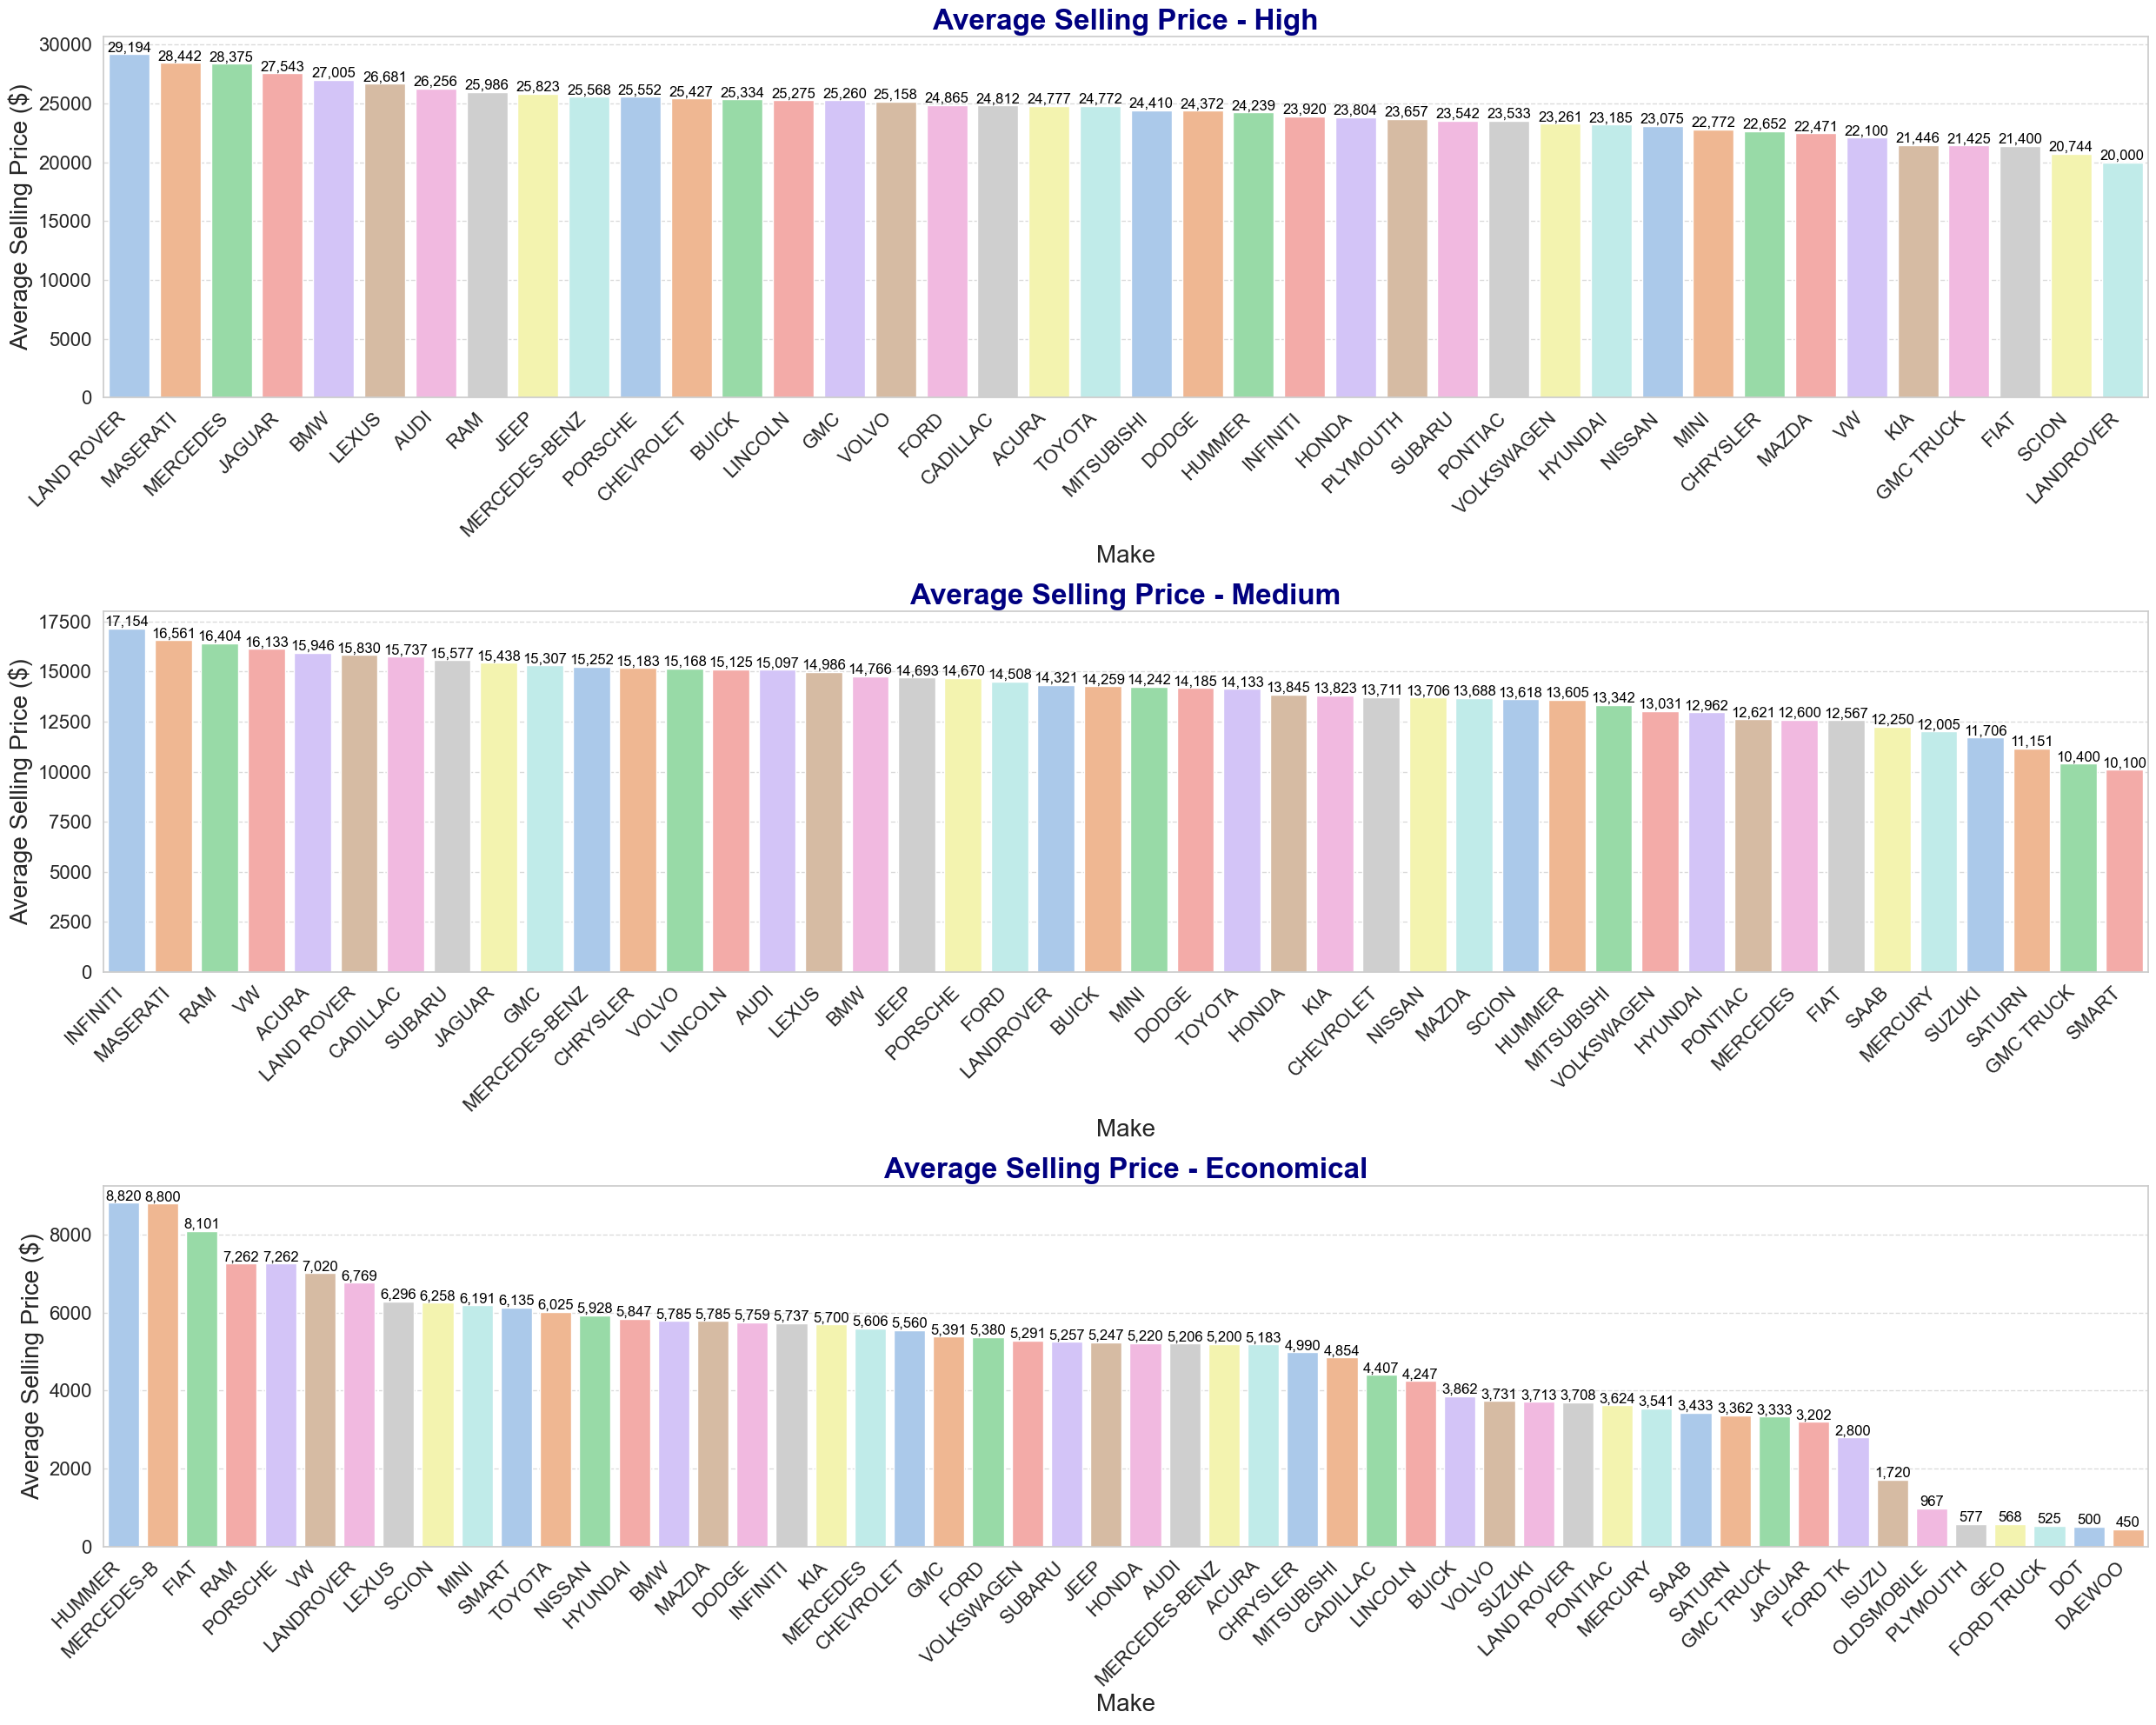

In [73]:
def categorize(price):
    if price < 10000:
        return 'Economical'
    elif 10000 <= price < 20000:
        return 'Medium'
    else:
        return 'High'

# Add a category column
df['category'] = df['sell_price'].apply(categorize)

# Group by make and calculate the average price
df_avg = df.groupby(['make', 'category'], as_index=False)['sell_price'].mean()

# Create separate plots for each category
plt.figure(figsize=(25, 20))

# Set the style for the plots
sns.set_style("whitegrid")

# Order of categories
ordered_categories = ['High', 'Medium', 'Economical']

# Loop through categories to plot each
for i, category in enumerate(ordered_categories):
    plt.subplot(3, 1, i + 1)  # Create 3 vertical subplots
    # Filter the average prices for the current category and sort them
    category_data = df_avg[df_avg['category'] == category]
    # Use a softer color palette
    palette = sns.color_palette("pastel")
    sns.barplot(data=category_data.sort_values(by='sell_price', ascending=False), 
                x='make', 
                y='sell_price', 
                palette=palette)
    
    plt.title(f'Average Selling Price - {category}', fontsize=24, fontweight='bold', color='navy')
    plt.xlabel('Make', fontsize=20)
    plt.ylabel('Average Selling Price ($)', fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()  
plt.show()


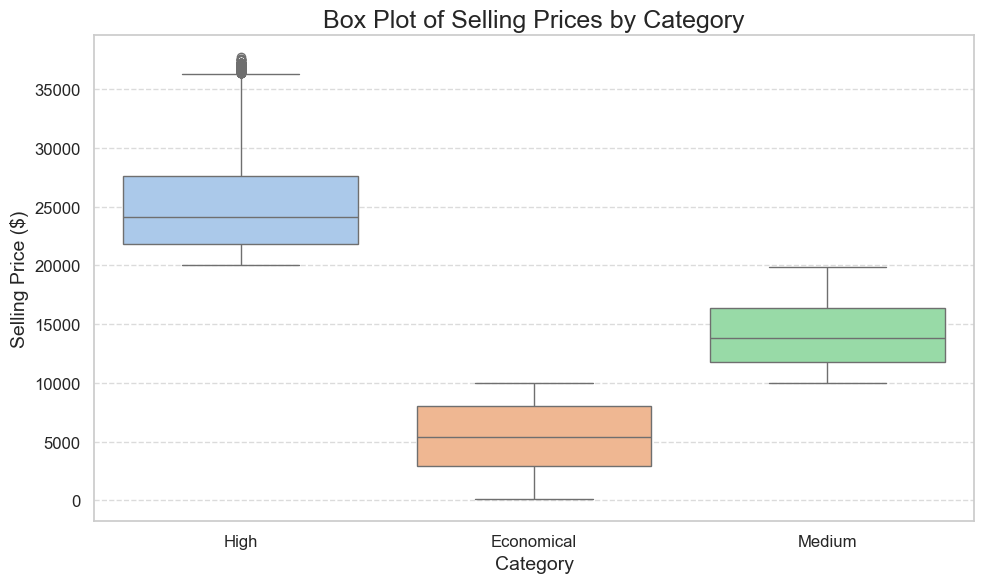

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='sell_price', palette='pastel')

plt.title('Box Plot of Selling Prices by Category', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Selling Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Category Breakdown:**

> High Category: Features luxury brands like BMW and Mercedes, appealing to affluent consumers seeking prestige.

> Medium Category: Targets middle-class buyers with reliable and efficient options.

> Economical Category: Attracts budget-conscious consumers, often including compact and older models

#### **Which states are the most sales-making**

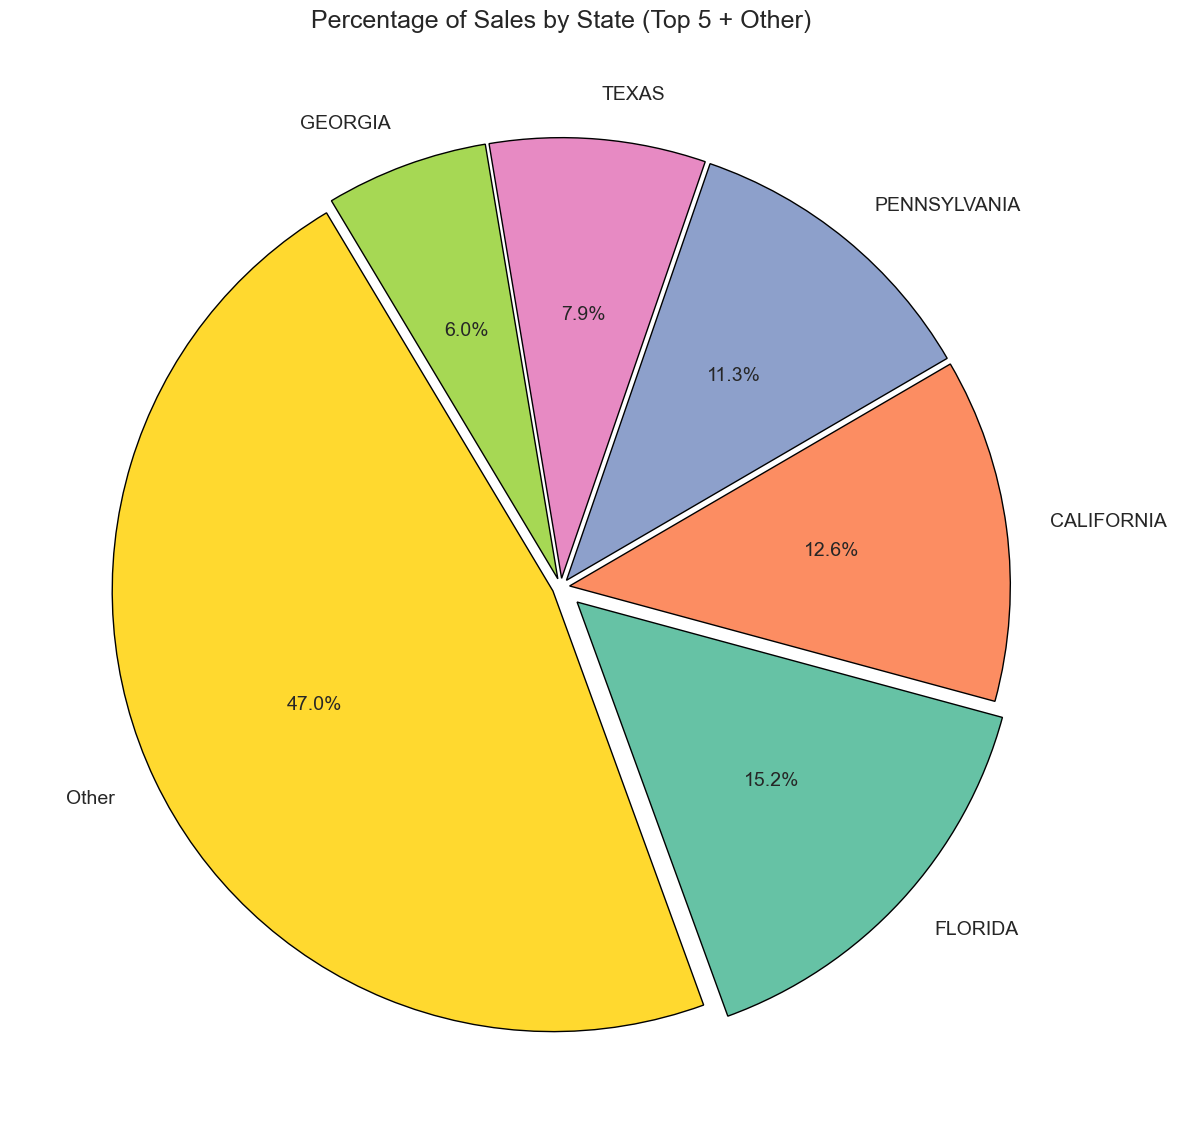

In [75]:
state_sales = df.groupby('state')['sell_price'].sum().sort_values(ascending=False)
top_6_states = state_sales.nlargest(5)
other_sales = state_sales.iloc[5:].sum()
other_series = pd.Series({'Other': other_sales})
top_6_states = pd.concat([top_6_states, other_series])

plt.figure(figsize=(12, 12))
colors = sns.color_palette("Set2", len(top_6_states))

explode = [0.05] + [0.02] * (len(top_6_states) - 1)

plt.pie(top_6_states.values,
        labels=top_6_states.index,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        startangle=290,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 14})

plt.title('Percentage of Sales by State (Top 5 + Other)', fontsize=18)
plt.tight_layout()
plt.show()

> The highest total sales of cars are in Florida, California, Pennsylvania, Texas, Georgia, in conjunction with the number of sales

#### **Which brands have the most models?**

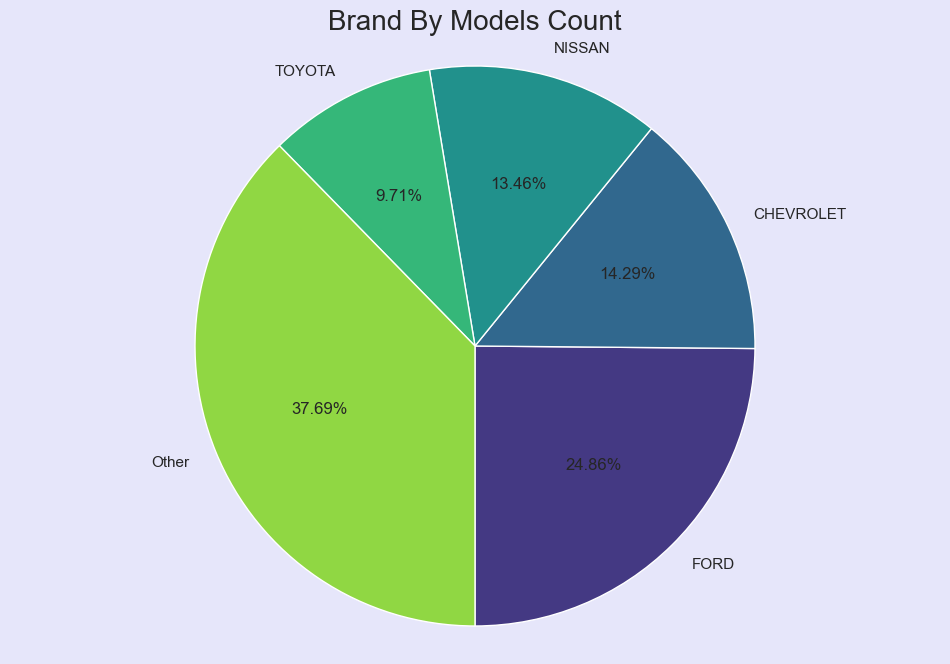

In [76]:
brand_car = df.groupby('make', as_index=False)['model'].count().sort_values('model', ascending=False)
top_10 = brand_car.head(4)
other_total = brand_car.iloc[10:]['model'].sum()
other_data = pd.DataFrame({'make': ['Other'], 'model': [other_total]})
combin_data = pd.concat([top_10, other_data])
plt.figure(figsize=(12, 8), facecolor='lavender')
plt.pie(combin_data['model'], labels=combin_data['make'], autopct='%1.2f%%',startangle=270, colors=sns.color_palette('viridis', len(combin_data)))
plt.title('Brand By Models Count', fontsize=20)
plt.axis('equal')
plt.show()

> Ford is the car that has a larger number of models, then Chevrolet

#### **Who are the most profitable sellers?**

In [77]:
top_sellers = df.groupby('seller')['sell_price'].sum().nlargest(5).reset_index()
top_sellers

seller   sell_price
0             nissan infiniti lt  456580011.0
1  ford motor credit company llc  306871800.0
2          the hertz corporation  232114601.0
3               avis corporation  183512130.0
4             santander consumer  115271200.0

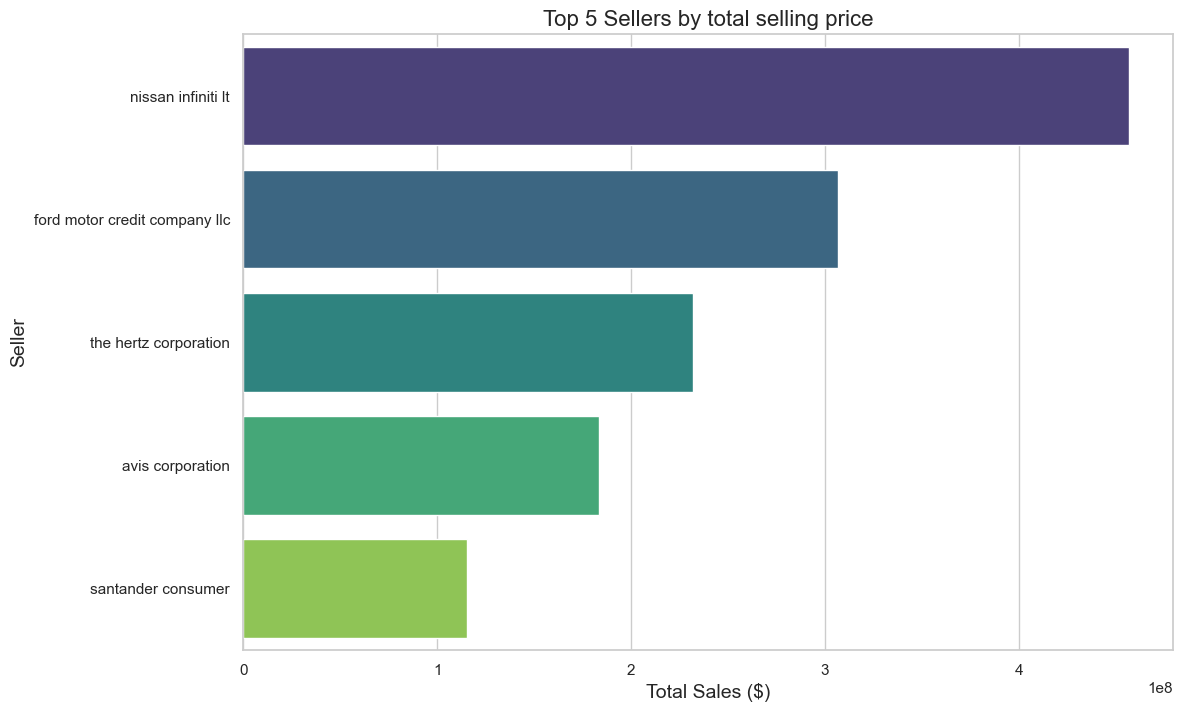

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sellers, x='sell_price', y='seller', palette='viridis')
plt.title('Top 5 Sellers by total selling price', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Seller', fontsize=14)
plt.show()

##### Insight on New Selling Prices by Sellers

1. **Price Analysis**:
   > The data shows that **Nissan Infiniti LT** tops the list with a new selling price of **$456,580,011**. This could indicate that this brand's cars are either highly popular or feature luxury models, reflecting a significant market value.

2. **Company Comparison**:
   > **Ford Motor Credit Company LLC** ranks second with a price of **$306,871,800**, followed by **The Hertz Corporation** at **$232,114,601**. This highlights the influence of well-established brands and their impact on the car sales market.


#### **What is most profitable Body?**

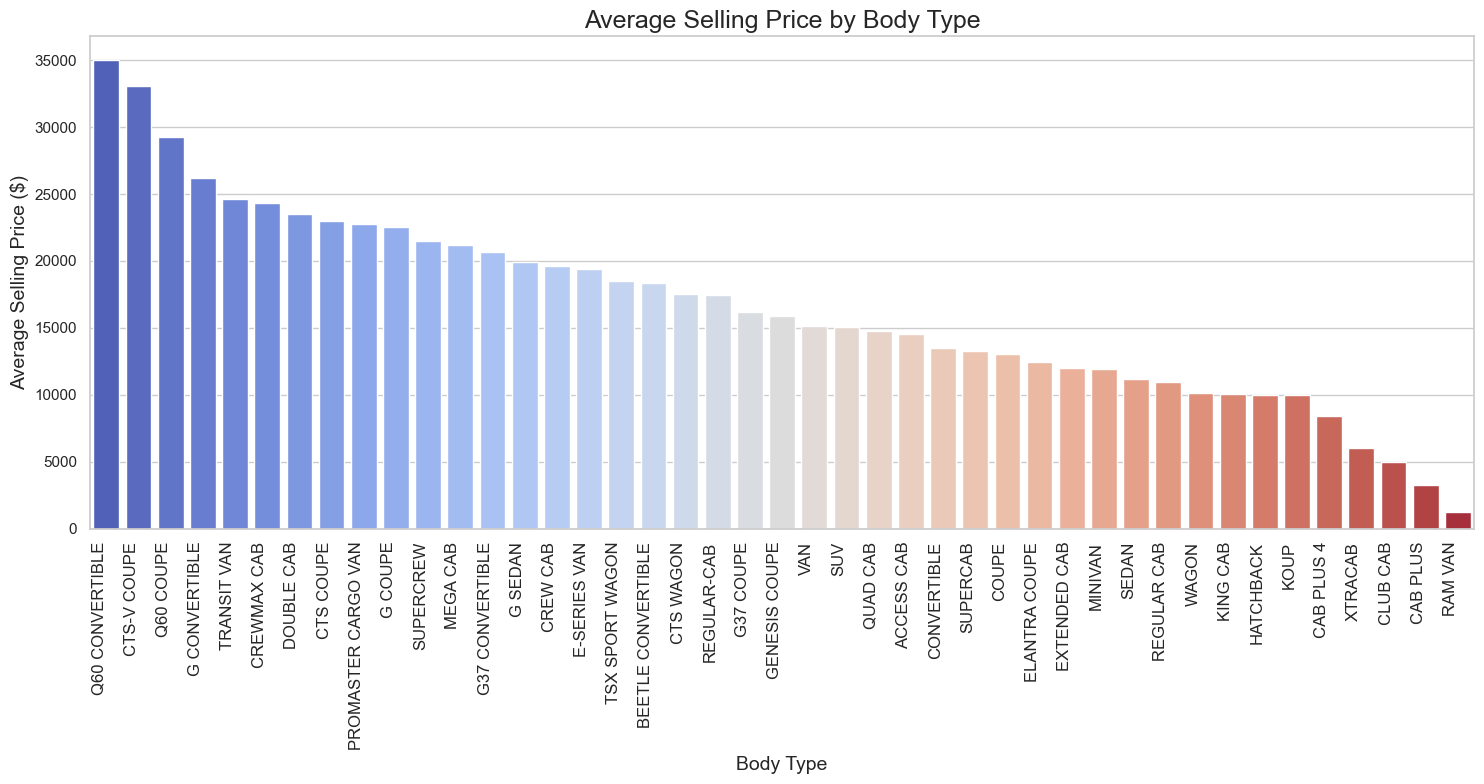

In [79]:
avg_body_prices = df.groupby('body')['sell_price'].mean().reset_index()
avg_body_prices = avg_body_prices.sort_values(by='sell_price', ascending=False)  

plt.figure(figsize=(15, 8))
sns.barplot(data=avg_body_prices, x='body', y='sell_price', palette='coolwarm')

plt.title('Average Selling Price by Body Type', fontsize=18)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12)

plt.tight_layout()

plt.show()

> 

## **Multivariant Analysis**

#### Top 3 sales models in the top 6 brands sales

In [80]:
total_sales = df.groupby(['make', 'model']).agg({'sell_price': 'sum'}).reset_index()
top_makes = total_sales.groupby('make')['sell_price'].sum().nlargest(6).index
top_models = total_sales[total_sales['make'].isin(top_makes)]
top_models = top_models.loc[top_models.groupby('make')['sell_price'].nlargest(3).reset_index(level=0, drop=True).index]

other_models = total_sales[total_sales['make'].isin(top_makes) & ~total_sales['model'].isin(top_models['model'])]
other_sales = other_models.groupby('make').agg({'sell_price': 'sum'}).reset_index()
other_sales['model'] = 'Other'

combined_top_models = pd.concat([top_models, other_sales], ignore_index=True)

C:\Users\eiadn\AppData\Local\Temp\ipykernel_26860\1158770907.py:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



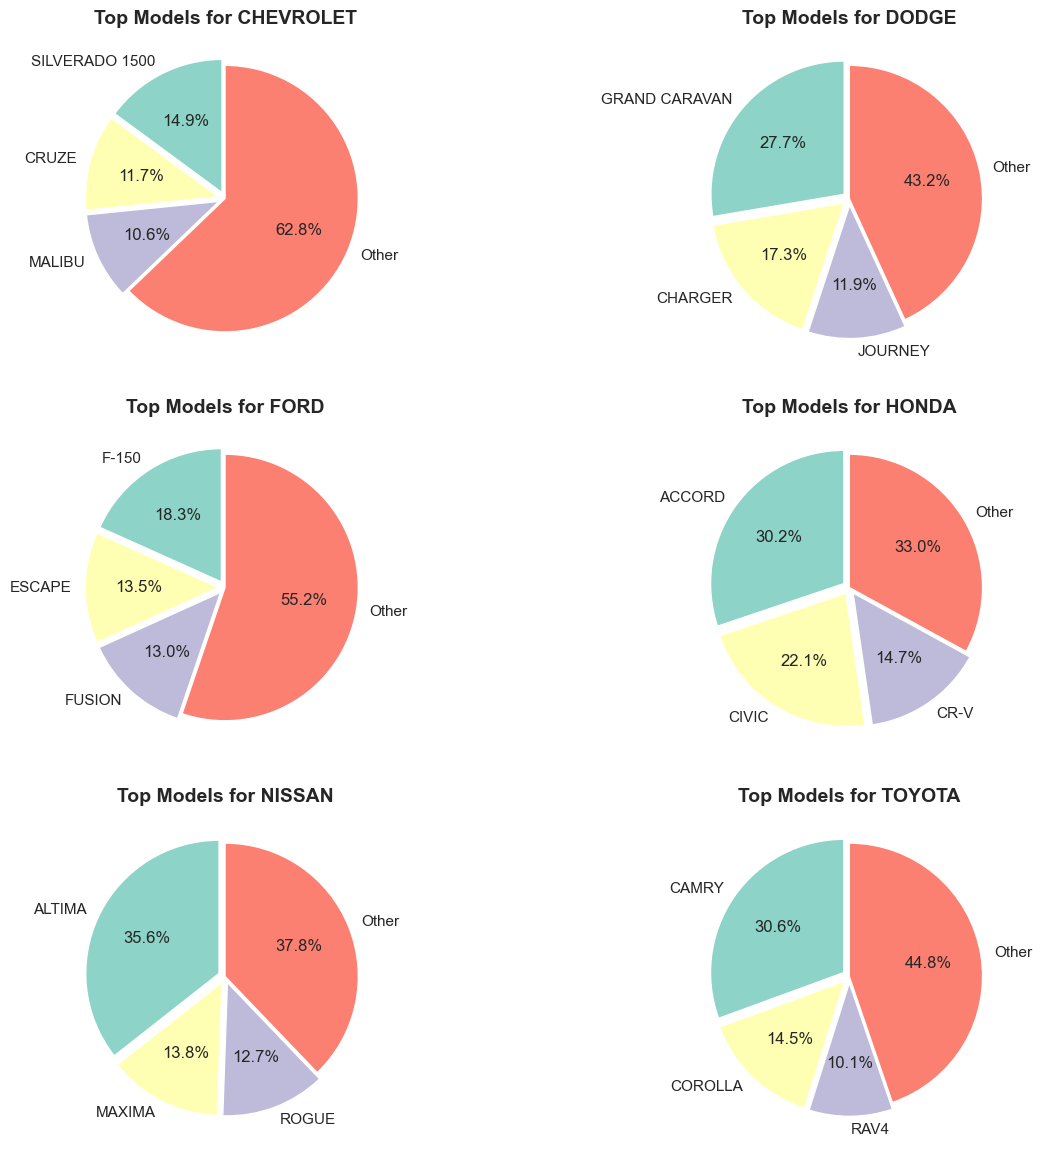

In [81]:
plt.figure(figsize=(14, 12))

for i, make in enumerate(combined_top_models['make'].unique(), start=1):
    plt.subplot(3, 2, i)
    colors = plt.cm.get_cmap('Set3').colors
    data = combined_top_models[combined_top_models['make'] == make]
    sizes = data['sell_price']
    labels = data['model']

    explode = [0.05 if label != 'Other' else 0 for label in labels]


    plt.pie(sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors[:len(sizes)],
            explode=explode,
            shadow=False)


    plt.title(f'Top Models for {make}', fontsize=14, fontweight='bold')
plt.tight_layout(pad=2)
plt.show()


#### Make vs. Transmission vs. Selling Price by Condition

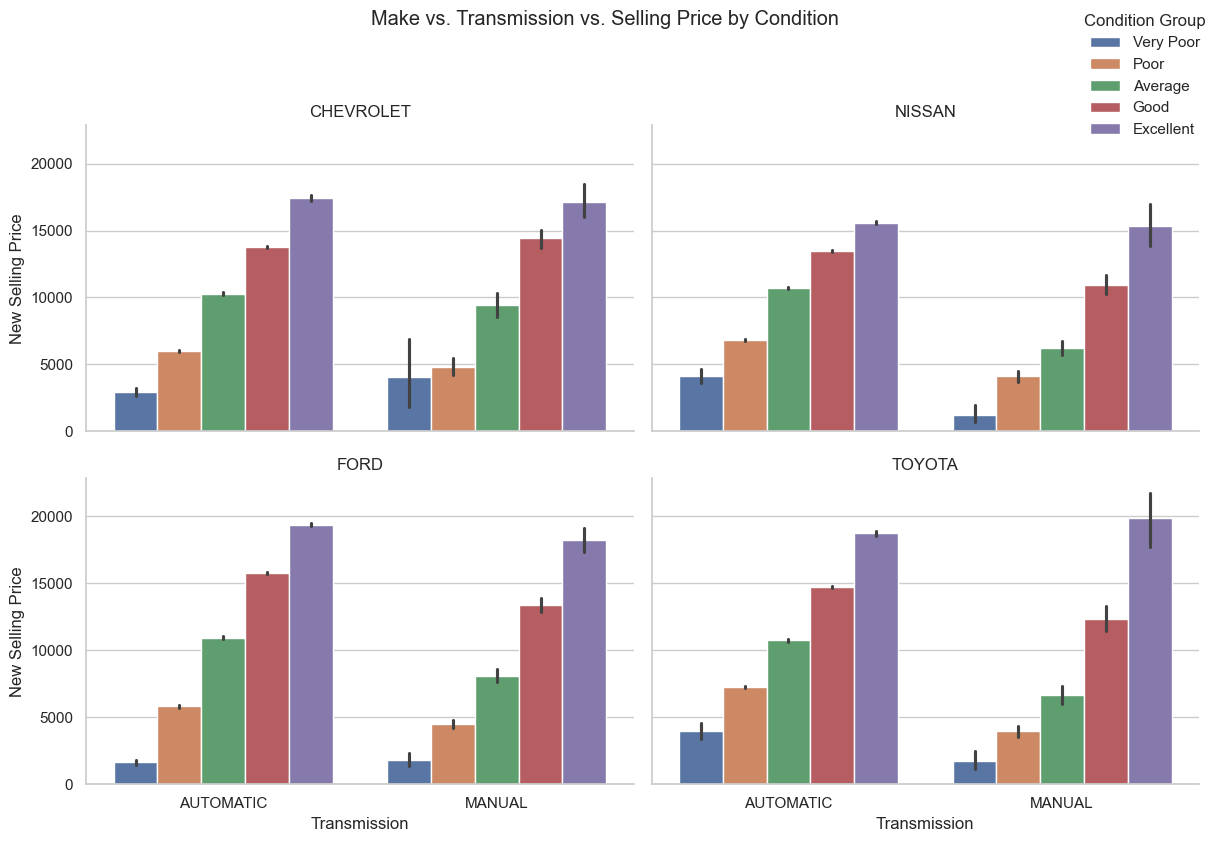

In [82]:
subset_makes = df['make'].value_counts().index[:4]
df_subset = df[df['make'].isin(subset_makes)]  

g = sns.catplot(x='transmission', y='sell_price', col='make',
                data=df_subset, kind='bar', col_wrap=2, height=4, aspect=1.2, hue='condition_group')

g.set_titles('{col_name}')
g.set_axis_labels('Transmission', 'New Selling Price')
g.fig.suptitle('Make vs. Transmission vs. Selling Price by Condition', y=1.05)

g._legend.remove()

g.add_legend(title='Condition Group', loc='upper right')

plt.tight_layout()
plt.show()


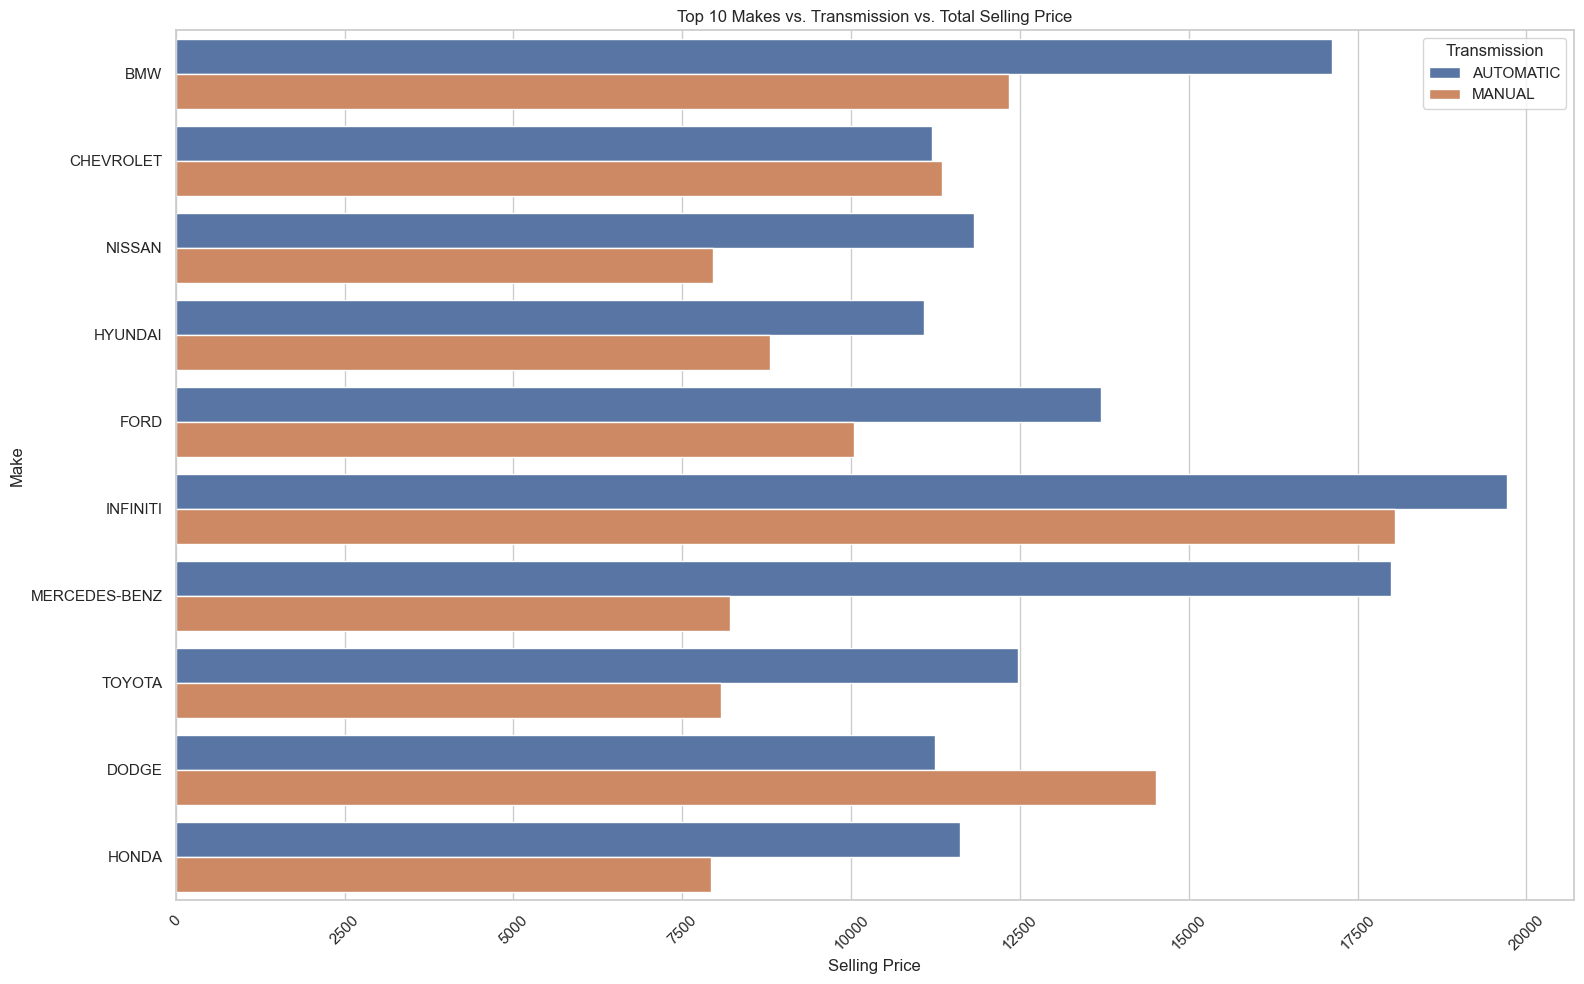

In [83]:
top_makes = df.groupby('make')['sell_price'].sum().nlargest(10).index
filtered_df = df[df['make'].isin(top_makes)]

plt.figure(figsize=(16, 10))

sns.barplot(data=filtered_df, y='make', x='sell_price', hue='transmission', ci=None, dodge=True)

plt.xticks(rotation=45)
plt.title('Top 10 Makes vs. Transmission vs. Total Selling Price')
plt.ylabel('Make')
plt.xlabel('Selling Price')
plt.legend(title='Transmission')

plt.tight_layout()
plt.show()

In [84]:
top_10_expensive_cars_full_details = df[['make','model', 'year', 'condition', 'sell_price']].sort_values(by='sell_price', ascending=False).head(10)


# Display the detailed top 10 most expensive cars table
display(top_10_expensive_cars_full_details)

make             model  year  condition  sell_price
254862       FORD             F-150  2014          5     37700.0
180046      DODGE           CHARGER  2013          4     37600.0
153096        GMC     SIERRA 2500HD  2011          5     37600.0
478234       FORD           MUSTANG  2012          5     37500.0
261458       FORD          EXPLORER  2014          5     37500.0
87518         BMW          5 SERIES  2012          4     37500.0
107973        BMW          3 SERIES  2014          5     37500.0
148170      LEXUS            GX 460  2012          4     37250.0
386407  CHEVROLET  SILVERADO 2500HD  2012          4     37250.0
16045        FORD             F-150  2014          4     37250.0

#### Top 10 Car Soldout count

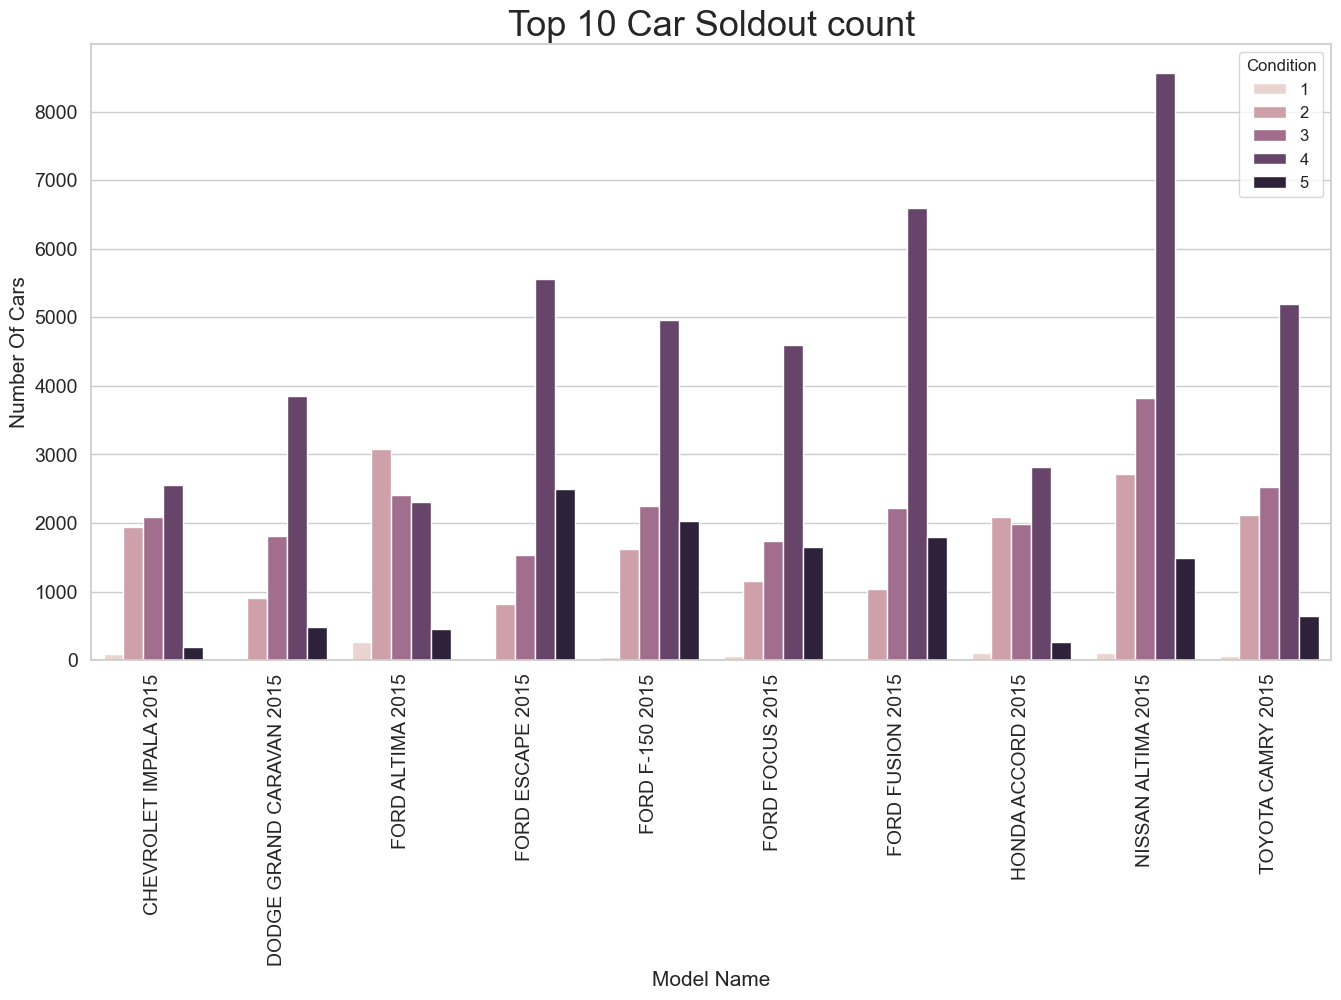

In [85]:
df['full_model'] = df['make'] + ' ' + df['model'] + ' ' + df['sale_year'].astype(str)
model_n = df.groupby(['full_model', 'condition']).size().reset_index(name='count')

top_models = model_n.groupby(['full_model'])['count'].sum().reset_index()
top_models = top_models.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(16, 8))

sns.barplot(data=model_n[model_n['full_model'].isin(top_models['full_model'])], x='full_model', y='count', hue='condition')

plt.xlabel('Model Name', fontsize=15)
plt.ylabel('Number Of Cars', fontsize=15)
plt.title('Top 10 Car Soldout count', fontsize=26)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Condition', fontsize=12)
plt.show()

#### 3D Plot: Year vs Condition vs Selling Price

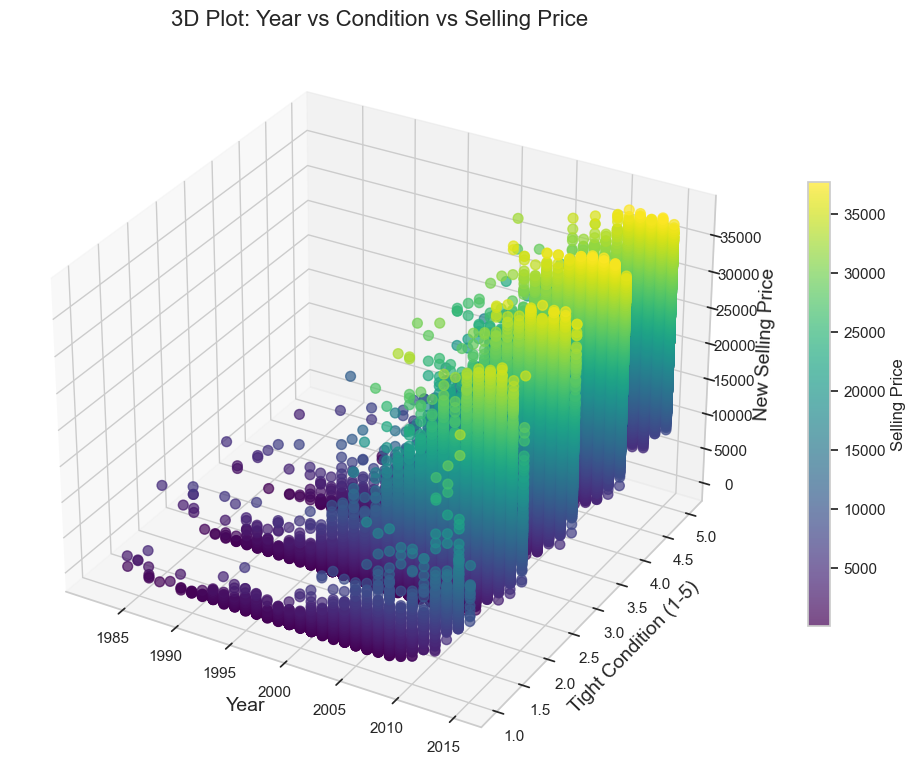

In [86]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['year'], df['condition'], df['sell_price'],
                c=df['sell_price'], cmap='viridis', s=50, alpha=0.7)

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Tight Condition (1-5)', fontsize=14)
ax.set_zlabel('New Selling Price', fontsize=14)
ax.set_title('3D Plot: Year vs Condition vs Selling Price', fontsize=16)

cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label('Selling Price')

plt.tight_layout()
plt.show()


#### 3D Plot: Condition Group vs. Odometer vs. New Selling Price

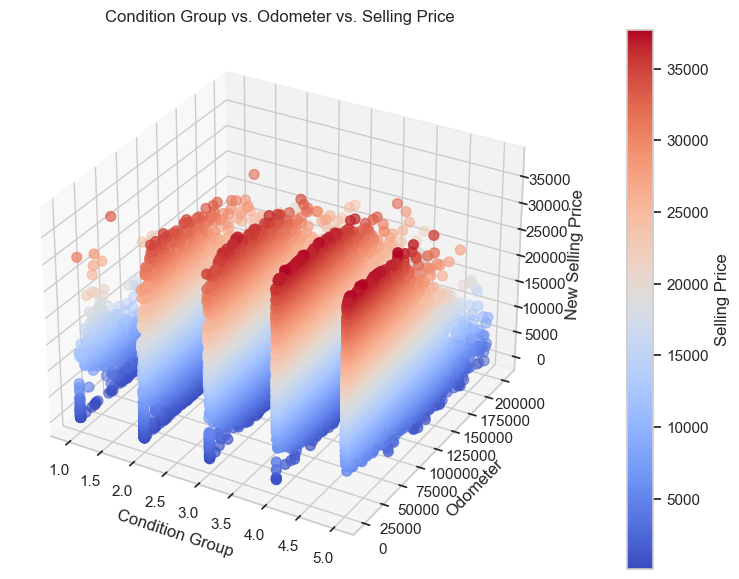

In [87]:
# Create a 3D scatter plot for Condition Group vs. Odometer vs. New Selling Price
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on new_selling_price
scatter = ax.scatter(df['condition'], df['odometer'], df['sell_price'],
                     c=df['sell_price'], cmap='coolwarm', s=50)

# Setting labels
ax.set_xlabel('Condition Group')
ax.set_ylabel('Odometer')
ax.set_zlabel('New Selling Price')
ax.set_title('Condition Group vs. Odometer vs. Selling Price')

# Add color bar for reference
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Selling Price')

plt.show()

3D Plot: Year vs. Odometer vs. Selling Price

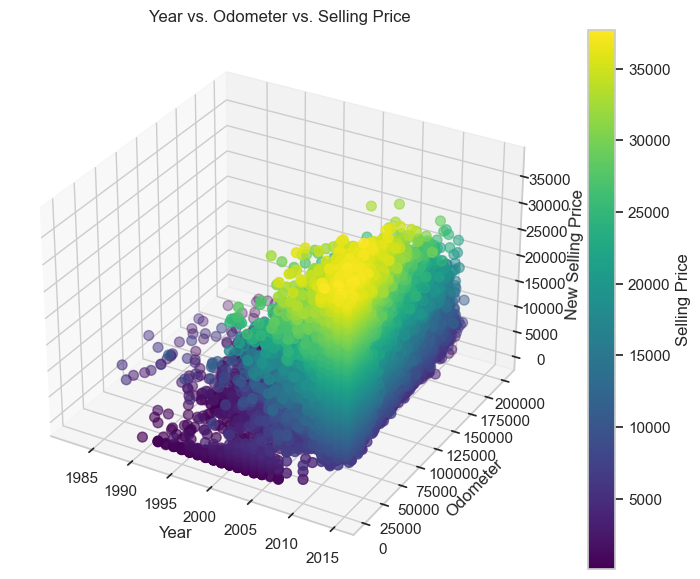

In [88]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['year'], df['odometer'], df['sell_price'],
                c=df['sell_price'], cmap='viridis', s=50)

ax.set_xlabel('Year')
ax.set_ylabel('Odometer')
ax.set_zlabel('New Selling Price')
ax.set_title('Year vs. Odometer vs. Selling Price')

cbar = plt.colorbar(sc)
cbar.set_label('Selling Price')

plt.show()


In [89]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['condition', 'odometer', 'mmr', 'sell_price']].corr()
plt.show()

<Figure size 1000x600 with 0 Axes>

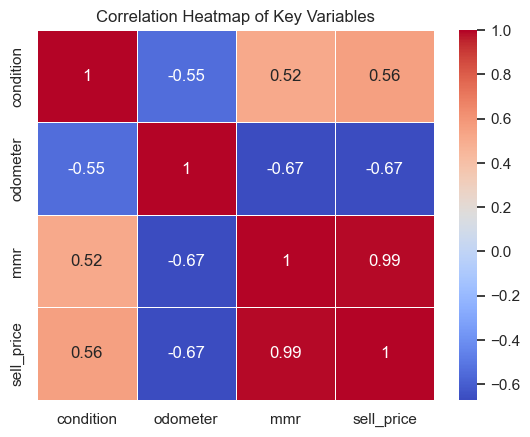

In [90]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()